# part 4

# Merged Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import re
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from scipy.stats import norm

In [3]:
exspidiaDF = pd.read_csv('expidia_match_booking.csv')
exspidiaDF.describe().T

count         mean         std  min    25%     50%  \
price                  54384.0  1003.386088  699.742837  0.0  500.0   897.5   
Breakfast_included     54384.0     0.091773    0.288708  0.0    0.0     0.0   
full_refund            54384.0     0.479902    0.499601  0.0    0.0     0.0   
reserve now pay later  54384.0     0.434907    0.495749  0.0    0.0     0.0   
hotel_rank             54384.0     7.963725    1.966660  0.0    8.0     8.4   
is_sustainable         54384.0     0.407454    0.491365  0.0    0.0     0.0   
review_count           54384.0  1027.186323  730.048472  0.0  760.0  1005.0   
TTT                    54384.0    24.784587   13.070881  0.0   15.0    24.0   
LOS                    54384.0     3.968667    1.404052  2.0    3.0     4.0   

                          75%      max  
price                  1373.0  24492.0  
Breakfast_included        0.0      1.0  
full_refund               1.0      1.0  
reserve now pay later     1.0      1.0  
hotel_rank                8.8     10.0  
is_sustainable            1.0      1.0  
review_count           1163.0   6102.0  
TTT                      35.0     49.0  
LOS                       5.0      6.0

In [4]:
bookingDF = pd.read_csv('booking_match_exspidia.csv')
bookingDF.describe().T

count         mean          std    min     25%  \
LOS                      68681.0     3.004688     1.413969   1.00    2.00   
TTT                      68681.0    15.450226     8.646241   1.00    8.00   
review_count             68681.0  2160.472838  2426.522135   0.00  700.00   
price                    68681.0   895.506805   498.734940  80.04  474.15   
is_sustainable           68681.0     0.611101     0.487504   0.00    0.00   
hotel_rank               68681.0     3.823314     0.662839   0.00    4.00   
full_refund              68681.0     0.587120     0.492355   0.00    0.00   
Breakfast_included       68681.0     0.220454     0.414556   0.00    0.00   
place_in_page            68681.0    80.915406    48.648500   1.00   40.00   
price_per_night_booking  68681.0   296.825780    82.431094  71.92  238.32   
weekdays_or_weekend      68681.0     0.557549     0.496681   0.00    0.00   
end_of_month             68681.0     0.067369     0.250663   0.00    0.00   

                            50%      75%       max  
LOS                         3.0     4.00      5.00  
TTT                        15.0    23.00     30.00  
review_count             1330.0  2578.00  15273.00  
price                     841.0  1244.39   2476.31  
is_sustainable              1.0     1.00      1.00  
hotel_rank                  4.0     4.00      5.00  
full_refund                 1.0     1.00      1.00  
Breakfast_included          0.0     0.00      1.00  
place_in_page              79.0   120.00    210.00  
price_per_night_booking   291.3   349.91    526.93  
weekdays_or_weekend         1.0     1.00      1.00  
end_of_month                0.0     0.00      1.00

In [5]:
bookingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68681 entries, 0 to 68680
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   check_in                 68681 non-null  object 
 1   check_out                68681 non-null  object 
 2   LOS                      68681 non-null  int64  
 3   TTT                      68681 non-null  int64  
 4   name                     68681 non-null  object 
 5   review_count             68681 non-null  float64
 6   price                    68681 non-null  float64
 7   is_sustainable           68681 non-null  int64  
 8   hotel_rank               68681 non-null  float64
 9   full_refund              68681 non-null  int64  
 10  Breakfast_included       68681 non-null  int64  
 11  place_in_page            68681 non-null  int64  
 12  price_per_night_booking  68681 non-null  float64
 13  weekdays_or_weekend      68681 non-null  int64  
 14  end_of_month          

In [6]:
exspidiaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   53054 non-null  object 
 1   price                  54384 non-null  int64  
 2   Breakfast_included     54384 non-null  int64  
 3   full_refund            54384 non-null  int64  
 4   reserve now pay later  54384 non-null  int64  
 5   hotel_rank             54384 non-null  float64
 6   is_sustainable         54384 non-null  int64  
 7   review_count           54384 non-null  int64  
 8   check_in               54384 non-null  object 
 9   check_out              54384 non-null  object 
 10  TTT                    54384 non-null  int64  
 11  LOS                    54384 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 5.0+ MB


## The first thing that we want to do is to show the exact data for both Expedia and booking, so we will remove all the columns that don’t have the same meaning on both and rename the column name to fit for both

In [7]:
bookingDF.rename(
    columns={"length_of_stay": "LOS", "time_to_travel": "TTT", "price": "price", "rating_stars": "hotel_rank","is_breakfast_included":"Breakfast_included","free_cancelation":"full_refund","price_per_night" : "price_per_night_booking"},
    inplace=True,
)
bookingDF.describe().T

count         mean          std    min     25%  \
LOS                      68681.0     3.004688     1.413969   1.00    2.00   
TTT                      68681.0    15.450226     8.646241   1.00    8.00   
review_count             68681.0  2160.472838  2426.522135   0.00  700.00   
price                    68681.0   895.506805   498.734940  80.04  474.15   
is_sustainable           68681.0     0.611101     0.487504   0.00    0.00   
hotel_rank               68681.0     3.823314     0.662839   0.00    4.00   
full_refund              68681.0     0.587120     0.492355   0.00    0.00   
Breakfast_included       68681.0     0.220454     0.414556   0.00    0.00   
place_in_page            68681.0    80.915406    48.648500   1.00   40.00   
price_per_night_booking  68681.0   296.825780    82.431094  71.92  238.32   
weekdays_or_weekend      68681.0     0.557549     0.496681   0.00    0.00   
end_of_month             68681.0     0.067369     0.250663   0.00    0.00   

                            50%      75%       max  
LOS                         3.0     4.00      5.00  
TTT                        15.0    23.00     30.00  
review_count             1330.0  2578.00  15273.00  
price                     841.0  1244.39   2476.31  
is_sustainable              1.0     1.00      1.00  
hotel_rank                  4.0     4.00      5.00  
full_refund                 1.0     1.00      1.00  
Breakfast_included          0.0     0.00      1.00  
place_in_page              79.0   120.00    210.00  
price_per_night_booking   291.3   349.91    526.93  
weekdays_or_weekend         1.0     1.00      1.00  
end_of_month                0.0     0.00      1.00

In [8]:
exspidiaDF.rename(
    columns={"rate out of 10": "hotel_rank", "number of reviews": "review_count", "price": "price", "properties left at this price":"is_sustainable","Breakfast include": "Breakfast_included","price_per_night" : "price_per_night_expidia","full refund":"full_refund"},
    inplace=True,
)
exspidiaDF.describe().T

count         mean         std  min    25%     50%  \
price                  54384.0  1003.386088  699.742837  0.0  500.0   897.5   
Breakfast_included     54384.0     0.091773    0.288708  0.0    0.0     0.0   
full_refund            54384.0     0.479902    0.499601  0.0    0.0     0.0   
reserve now pay later  54384.0     0.434907    0.495749  0.0    0.0     0.0   
hotel_rank             54384.0     7.963725    1.966660  0.0    8.0     8.4   
is_sustainable         54384.0     0.407454    0.491365  0.0    0.0     0.0   
review_count           54384.0  1027.186323  730.048472  0.0  760.0  1005.0   
TTT                    54384.0    24.784587   13.070881  0.0   15.0    24.0   
LOS                    54384.0     3.968667    1.404052  2.0    3.0     4.0   

                          75%      max  
price                  1373.0  24492.0  
Breakfast_included        0.0      1.0  
full_refund               1.0      1.0  
reserve now pay later     1.0      1.0  
hotel_rank                8.8     10.0  
is_sustainable            1.0      1.0  
review_count           1163.0   6102.0  
TTT                      35.0     49.0  
LOS                       5.0      6.0

## here we want

In [9]:
bookingDF['check_out'] = pd.to_datetime(bookingDF['check_out'])
bookingDF['check_in'] = pd.to_datetime(bookingDF['check_in'])
bookingDF['duration'] = (bookingDF['check_out'] - bookingDF['check_in']).dt.days + 1
bookingDF['weekend'] = ((pd.to_datetime(bookingDF['check_in']).dt.dayofweek >= 5) |
                 (pd.to_datetime(bookingDF['check_out']).dt.dayofweek >= 5)).astype(int)
bookingDF['weekdays_or_weekend'] = ((bookingDF['duration'] == bookingDF['weekend']) | (bookingDF['weekend'] > 0)).astype(int)
bookingDF["check_in_end_of_month"] = bookingDF['check_in'].dt.is_month_end.astype(int)
bookingDF["check_out_end_of_month"] = bookingDF['check_out'].dt.is_month_end.astype(int)
bookingDF['end_of_month'] = (bookingDF["check_in_end_of_month"] | bookingDF['check_out_end_of_month']).astype(int)
bookingDF = bookingDF.drop(columns=['duration', 'weekend',"check_in_end_of_month","check_out_end_of_month"])
bookingDF.describe().T

count         mean          std    min     25%  \
LOS                      68681.0     3.004688     1.413969   1.00    2.00   
TTT                      68681.0    15.450226     8.646241   1.00    8.00   
review_count             68681.0  2160.472838  2426.522135   0.00  700.00   
price                    68681.0   895.506805   498.734940  80.04  474.15   
is_sustainable           68681.0     0.611101     0.487504   0.00    0.00   
hotel_rank               68681.0     3.823314     0.662839   0.00    4.00   
full_refund              68681.0     0.587120     0.492355   0.00    0.00   
Breakfast_included       68681.0     0.220454     0.414556   0.00    0.00   
place_in_page            68681.0    80.915406    48.648500   1.00   40.00   
price_per_night_booking  68681.0   296.825780    82.431094  71.92  238.32   
weekdays_or_weekend      68681.0     0.557549     0.496681   0.00    0.00   
end_of_month             68681.0     0.067369     0.250663   0.00    0.00   

                            50%      75%       max  
LOS                         3.0     4.00      5.00  
TTT                        15.0    23.00     30.00  
review_count             1330.0  2578.00  15273.00  
price                     841.0  1244.39   2476.31  
is_sustainable              1.0     1.00      1.00  
hotel_rank                  4.0     4.00      5.00  
full_refund                 1.0     1.00      1.00  
Breakfast_included          0.0     0.00      1.00  
place_in_page              79.0   120.00    210.00  
price_per_night_booking   291.3   349.91    526.93  
weekdays_or_weekend         1.0     1.00      1.00  
end_of_month                0.0     0.00      1.00

In [ ]:
exspidiaDF = exspidiaDF.drop(["reserve now pay later"], axis=1)

In [ ]:
bookingDF = bookingDF.drop(["location_score","bed_room_type","review_score","review_summery","room_name_type","distance_from_center_by_km","preferred_badge","is_promoted","element","url","recommended_unit", 'address'],axis=1)

In [12]:
exspidiaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   53054 non-null  object 
 1   price                  54384 non-null  int64  
 2   Breakfast_included     54384 non-null  int64  
 3   full_refund            54384 non-null  int64  
 4   reserve now pay later  54384 non-null  int64  
 5   hotel_rank             54384 non-null  float64
 6   is_sustainable         54384 non-null  int64  
 7   review_count           54384 non-null  int64  
 8   check_in               54384 non-null  object 
 9   check_out              54384 non-null  object 
 10  TTT                    54384 non-null  int64  
 11  LOS                    54384 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 5.0+ MB


In [13]:
bookingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68681 entries, 0 to 68680
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   check_in                 68681 non-null  datetime64[ns]
 1   check_out                68681 non-null  datetime64[ns]
 2   LOS                      68681 non-null  int64         
 3   TTT                      68681 non-null  int64         
 4   name                     68681 non-null  object        
 5   review_count             68681 non-null  float64       
 6   price                    68681 non-null  float64       
 7   is_sustainable           68681 non-null  int64         
 8   hotel_rank               68681 non-null  float64       
 9   full_refund              68681 non-null  int64         
 10  Breakfast_included       68681 non-null  int64         
 11  place_in_page            68681 non-null  int64         
 12  price_per_night_booking  68681 n

### now that we have the same columns, we want to clean the data to fit and the same for both databases so we can run on those three single-valued values,
## the name of the hotel
## the check-in date and the check-out date

In [14]:
bookingDF['check_in'] = bookingDF['check_in'].astype(str)
bookingDF['check_out'] = bookingDF['check_out'].astype(str)
exspidiaDF['check_in'] = exspidiaDF['check_in'].astype(str)
exspidiaDF['check_out'] = exspidiaDF['check_out'].astype(str)

In [15]:
bookingDF["name"] = bookingDF["name"].str.lower()
bookingDF["name"] = bookingDF["name"].str.replace(',','')
bookingDF["name"] = bookingDF["name"].str.replace('nyc','')
bookingDF["name"] = bookingDF["name"].str.replace('ny','')
bookingDF["name"] = bookingDF["name"].str.replace('new york','')
bookingDF["name"] = bookingDF["name"].str.replace('hotel','')
bookingDF["name"] = bookingDF["name"].str.replace('5th ave','')
bookingDF["name"] = bookingDF["name"].str.replace('manhattan','')
bookingDF["name"] = bookingDF["name"].str.replace('times square','')
bookingDF["name"] = bookingDF["name"].str.replace('/','')
bookingDF["name"] = bookingDF["name"].str.replace('  ','')
bookingDF["name"] = bookingDF["name"].str.replace('-','')
bookingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68681 entries, 0 to 68680
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   check_in                 68681 non-null  object 
 1   check_out                68681 non-null  object 
 2   LOS                      68681 non-null  int64  
 3   TTT                      68681 non-null  int64  
 4   name                     68681 non-null  object 
 5   review_count             68681 non-null  float64
 6   price                    68681 non-null  float64
 7   is_sustainable           68681 non-null  int64  
 8   hotel_rank               68681 non-null  float64
 9   full_refund              68681 non-null  int64  
 10  Breakfast_included       68681 non-null  int64  
 11  place_in_page            68681 non-null  int64  
 12  price_per_night_booking  68681 non-null  float64
 13  weekdays_or_weekend      68681 non-null  int64  
 14  end_of_month          

In [16]:
exspidiaDF["name"] = exspidiaDF["name"].str.lower()
exspidiaDF["name"] = exspidiaDF["name"].str.replace(',','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('/','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('nyc','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('ny','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('new york','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('hotel','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('5th ave','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('manhattan','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('times square','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('  ','')
exspidiaDF["name"] = exspidiaDF["name"].str.replace('-','')
exspidiaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   53054 non-null  object 
 1   price                  54384 non-null  int64  
 2   Breakfast_included     54384 non-null  int64  
 3   full_refund            54384 non-null  int64  
 4   reserve now pay later  54384 non-null  int64  
 5   hotel_rank             54384 non-null  float64
 6   is_sustainable         54384 non-null  int64  
 7   review_count           54384 non-null  int64  
 8   check_in               54384 non-null  object 
 9   check_out              54384 non-null  object 
 10  TTT                    54384 non-null  int64  
 11  LOS                    54384 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 5.0+ MB


# Merge

In [17]:
df_merged = pd.merge(exspidiaDF,bookingDF,how='inner', left_on=['name', 'check_in', 'check_out'],right_on=['name', 'check_in', 'check_out'])

In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39245 entries, 0 to 39244
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     39245 non-null  object 
 1   price_x                  39245 non-null  int64  
 2   Breakfast_included_x     39245 non-null  int64  
 3   full_refund_x            39245 non-null  int64  
 4   reserve now pay later    39245 non-null  int64  
 5   hotel_rank_x             39245 non-null  float64
 6   is_sustainable_x         39245 non-null  int64  
 7   review_count_x           39245 non-null  int64  
 8   check_in                 39245 non-null  object 
 9   check_out                39245 non-null  object 
 10  TTT_x                    39245 non-null  int64  
 11  LOS_x                    39245 non-null  int64  
 12  LOS_y                    39245 non-null  int64  
 13  TTT_y                    39245 non-null  int64  
 14  review_count_y        

## exspidia colums are "_x" and bookings are "_y"

In [19]:
df_merged.describe().T

count         mean          std     min      25%  \
price_x                  39245.0   965.309364   542.484019    0.00   515.00   
Breakfast_included_x     39245.0     0.066709     0.249521    0.00     0.00   
full_refund_x            39245.0     0.569321     0.495178    0.00     0.00   
reserve now pay later    39245.0     0.508090     0.499941    0.00     0.00   
hotel_rank_x             39245.0     8.371461     0.891152    0.00     8.00   
is_sustainable_x         39245.0     0.430908     0.495210    0.00     0.00   
review_count_x           39245.0  1321.889948   906.056519    0.00  1002.00   
TTT_x                    39245.0    26.128348    11.333876    0.00    21.00   
LOS_x                    39245.0     3.966034     1.405862    2.00     3.00   
LOS_y                    39245.0     2.966034     1.405862    1.00     2.00   
TTT_y                    39245.0    14.228743     9.086280    1.00     6.00   
review_count_y           39245.0  2638.265053  3160.039722    0.00   668.00   
price_y                  39245.0   820.718740   468.175179  100.63   433.26   
is_sustainable_y         39245.0     0.627647     0.483438    0.00     0.00   
hotel_rank_y             39245.0     3.979845     0.439809    0.00     4.00   
full_refund_y            39245.0     0.535635     0.498735    0.00     0.00   
Breakfast_included_y     39245.0     0.079577     0.270641    0.00     0.00   
place_in_page            39245.0    75.913288    48.985584    1.00    33.00   
price_per_night_booking  39245.0   274.530714    78.448592   83.45   217.06   
weekdays_or_weekend      39245.0     0.568378     0.495309    0.00     0.00   
end_of_month             39245.0     0.116473     0.320796    0.00     0.00   

                             50%      75%       max  
price_x                   888.00  1340.00   3015.00  
Breakfast_included_x        0.00     0.00      1.00  
full_refund_x               1.00     1.00      1.00  
reserve now pay later       1.00     1.00      1.00  
hotel_rank_x                8.60     8.80     10.00  
is_sustainable_x            0.00     1.00      1.00  
review_count_x           1009.00  1587.00   6102.00  
TTT_x                      26.00    32.00     49.00  
LOS_x                       4.00     5.00      6.00  
LOS_y                       3.00     4.00      5.00  
TTT_y                      13.00    22.00     30.00  
review_count_y           1403.00  2991.00  15273.00  
price_y                   749.07  1143.47   2447.31  
is_sustainable_y            1.00     1.00      1.00  
hotel_rank_y                4.00     4.00      5.00  
full_refund_y               1.00     1.00      1.00  
Breakfast_included_y        0.00     0.00      1.00  
place_in_page              73.00   114.00    210.00  
price_per_night_booking   268.10   323.06    525.77  
weekdays_or_weekend         1.00     1.00      1.00  
end_of_month                0.00     0.00      1.00

## eda

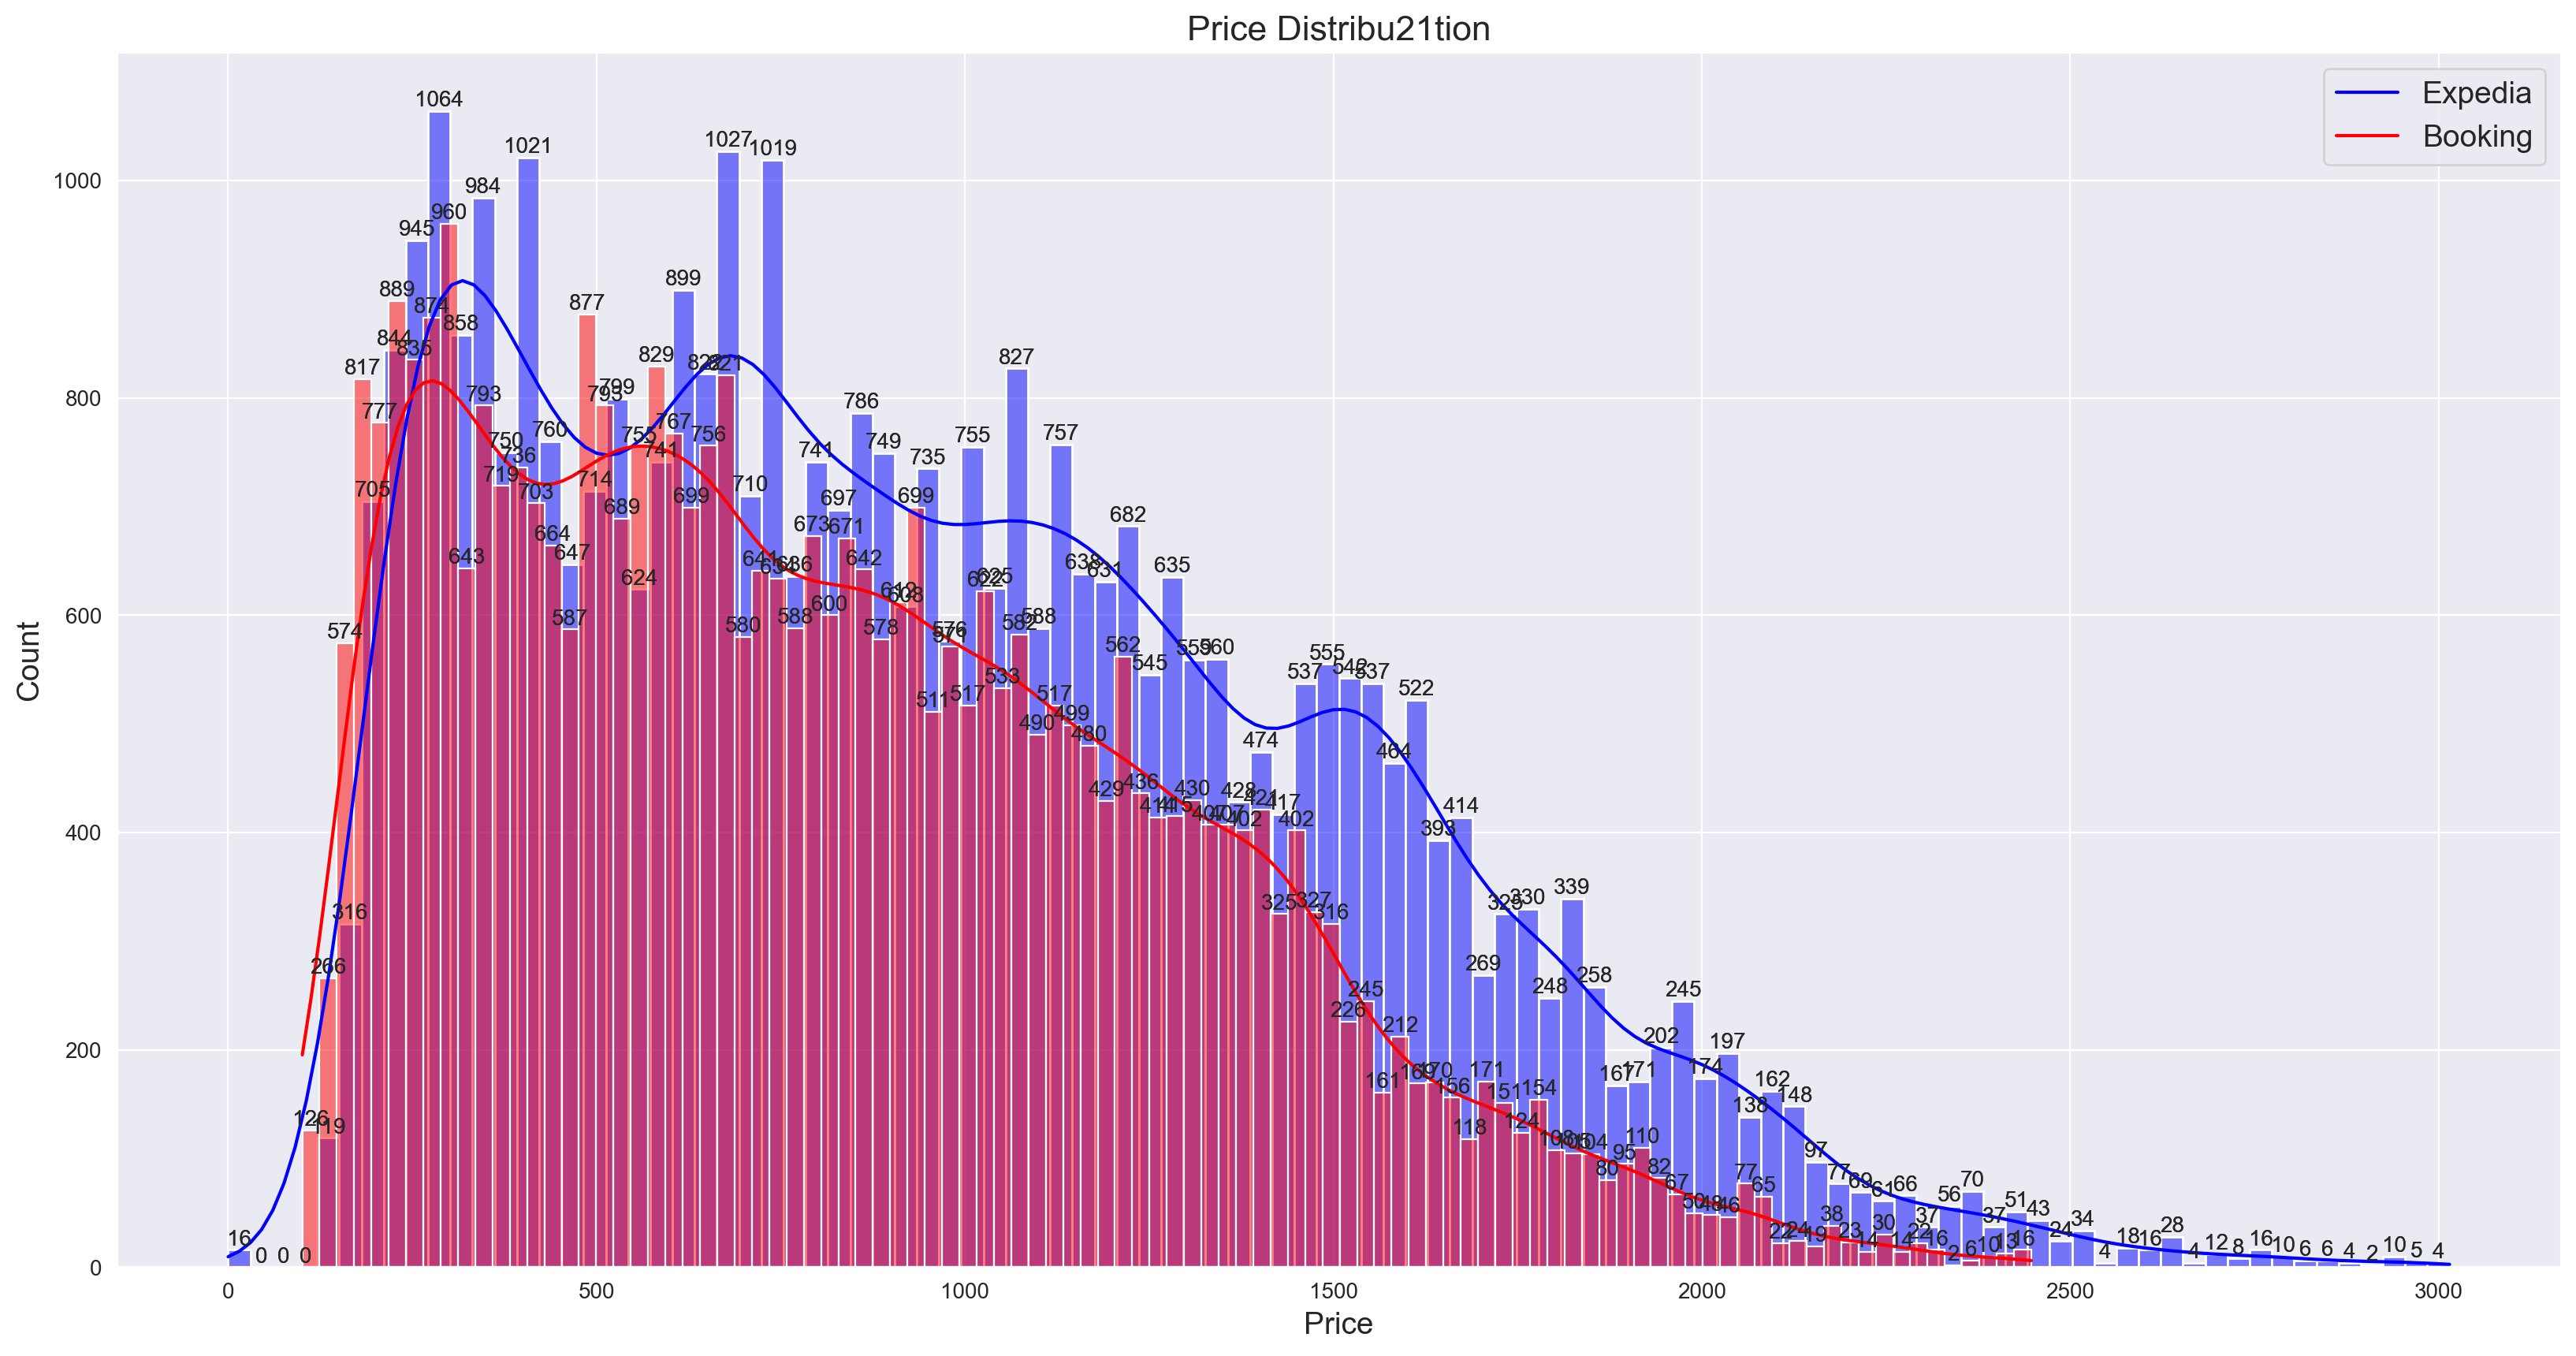

In [20]:
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(20, 10))

ax = sns.histplot(df_merged['price_x'], bins=100, kde=True, alpha=0.5, color='blue')
bx = sns.histplot(df_merged['price_y'], bins=100, kde=True, alpha=0.5, color='red')

plt.legend(['Expedia', 'Booking'], fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price Distribu21tion', fontsize=16)

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

for rect in bx.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

plt.show()

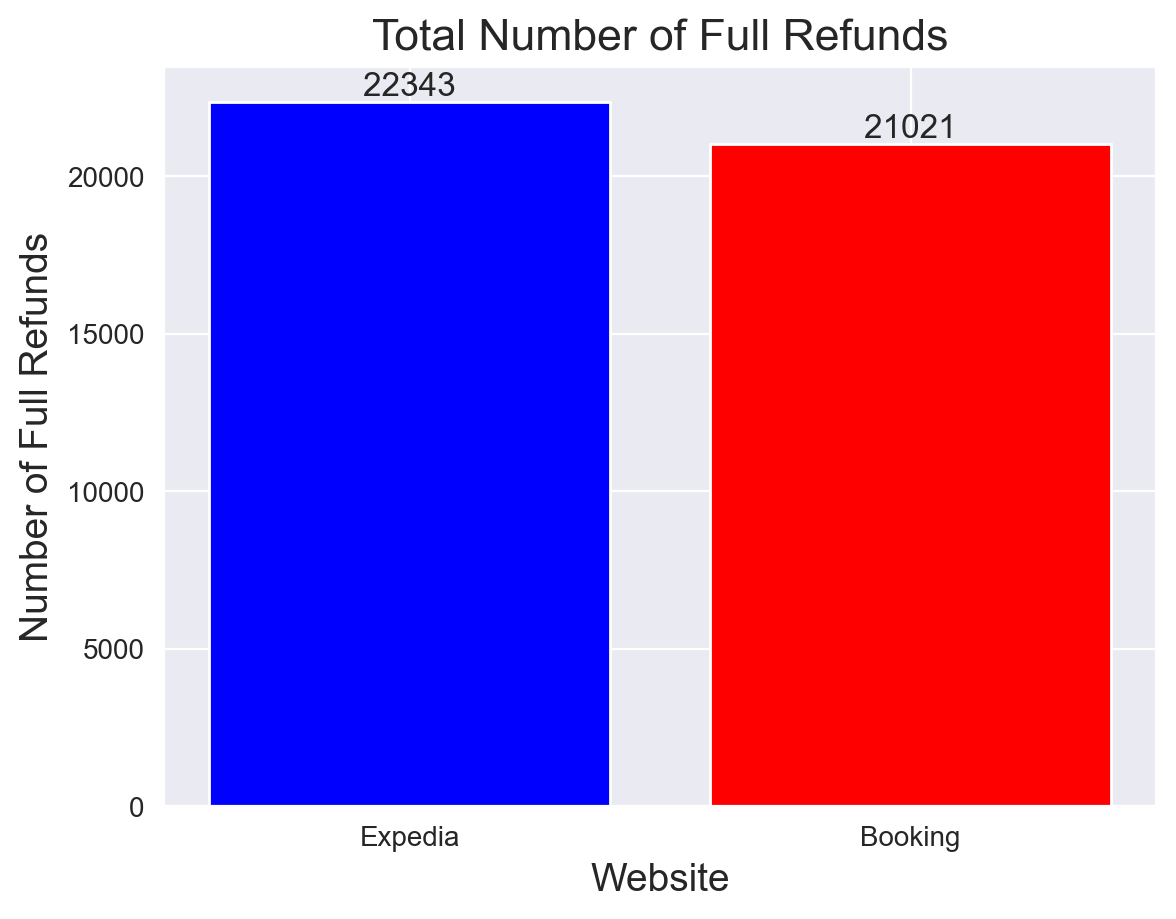

In [21]:
full_refund_expedi = df_merged['full_refund_x'].sum()
full_refund_booking = df_merged['full_refund_y'].sum()

websites = ['Expedia', 'Booking']
full_refunds = [full_refund_expedi, full_refund_booking]

plt.bar(websites, full_refunds, color=['blue', 'red'])
plt.title('Total Number of Full Refunds', fontsize=16)
plt.xlabel('Website', fontsize=14)
plt.ylabel('Number of Full Refunds', fontsize=14)

# Add numbers on top of each bar
for i, v in enumerate(full_refunds):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

In [22]:
df_merged["price_difference"] = df_merged["price_x"] - df_merged["price_y"]

## if price difference > 0:
    expidia as hihger price
## if price difference < 0:
    booking as hihger price

In [25]:
df_merged["price_difference"].describe().T

count    39245.000000
mean       144.590625
std        140.010207
min      -1076.480000
25%         53.850000
50%        120.630000
75%        223.040000
max        954.860000
Name: price_difference, dtype: float64

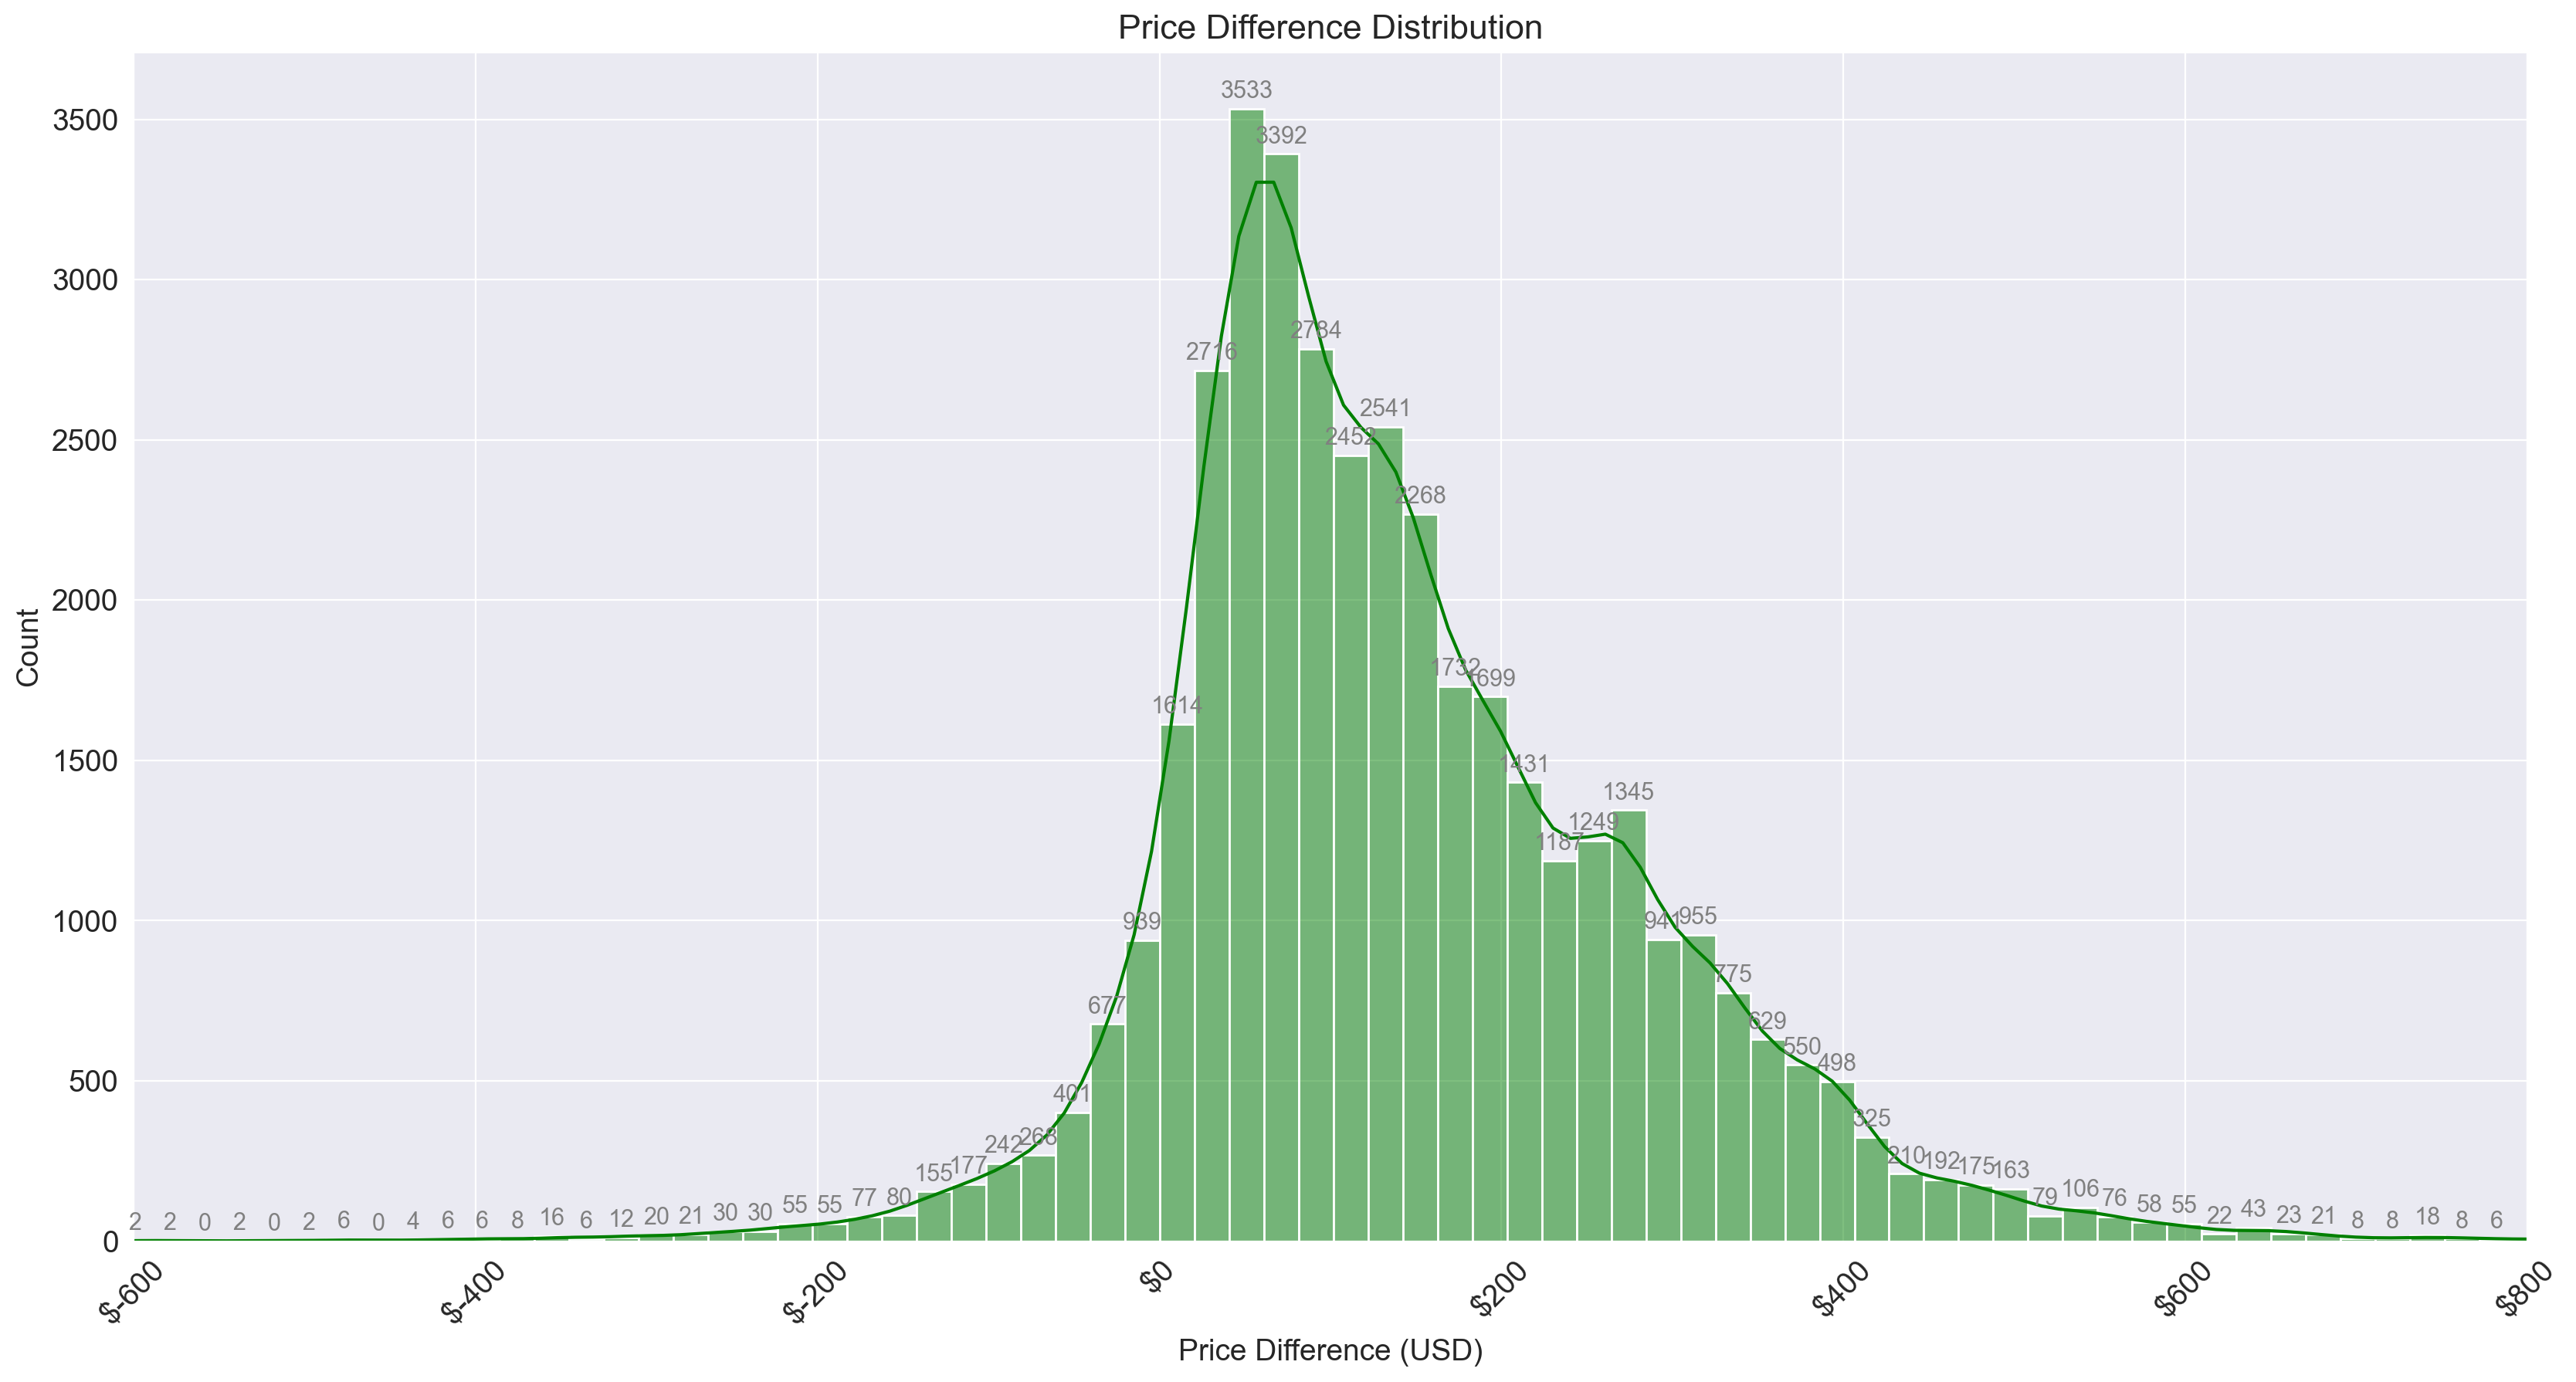

In [26]:
plt.figure(figsize=(20, 10))
sns.histplot(df_merged['price_difference'], bins=100, kde=True, alpha=0.5, color='green')
plt.xlabel('Price Difference (USD)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price Difference Distribution', fontsize=16)

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Set x-axis limits and tick labels
xtick_labels = ['${}'.format(x) for x in range(-600, 801, 200)]
plt.xticks(range(-600, 801, 200), xtick_labels, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-600, 800)

plt.show()

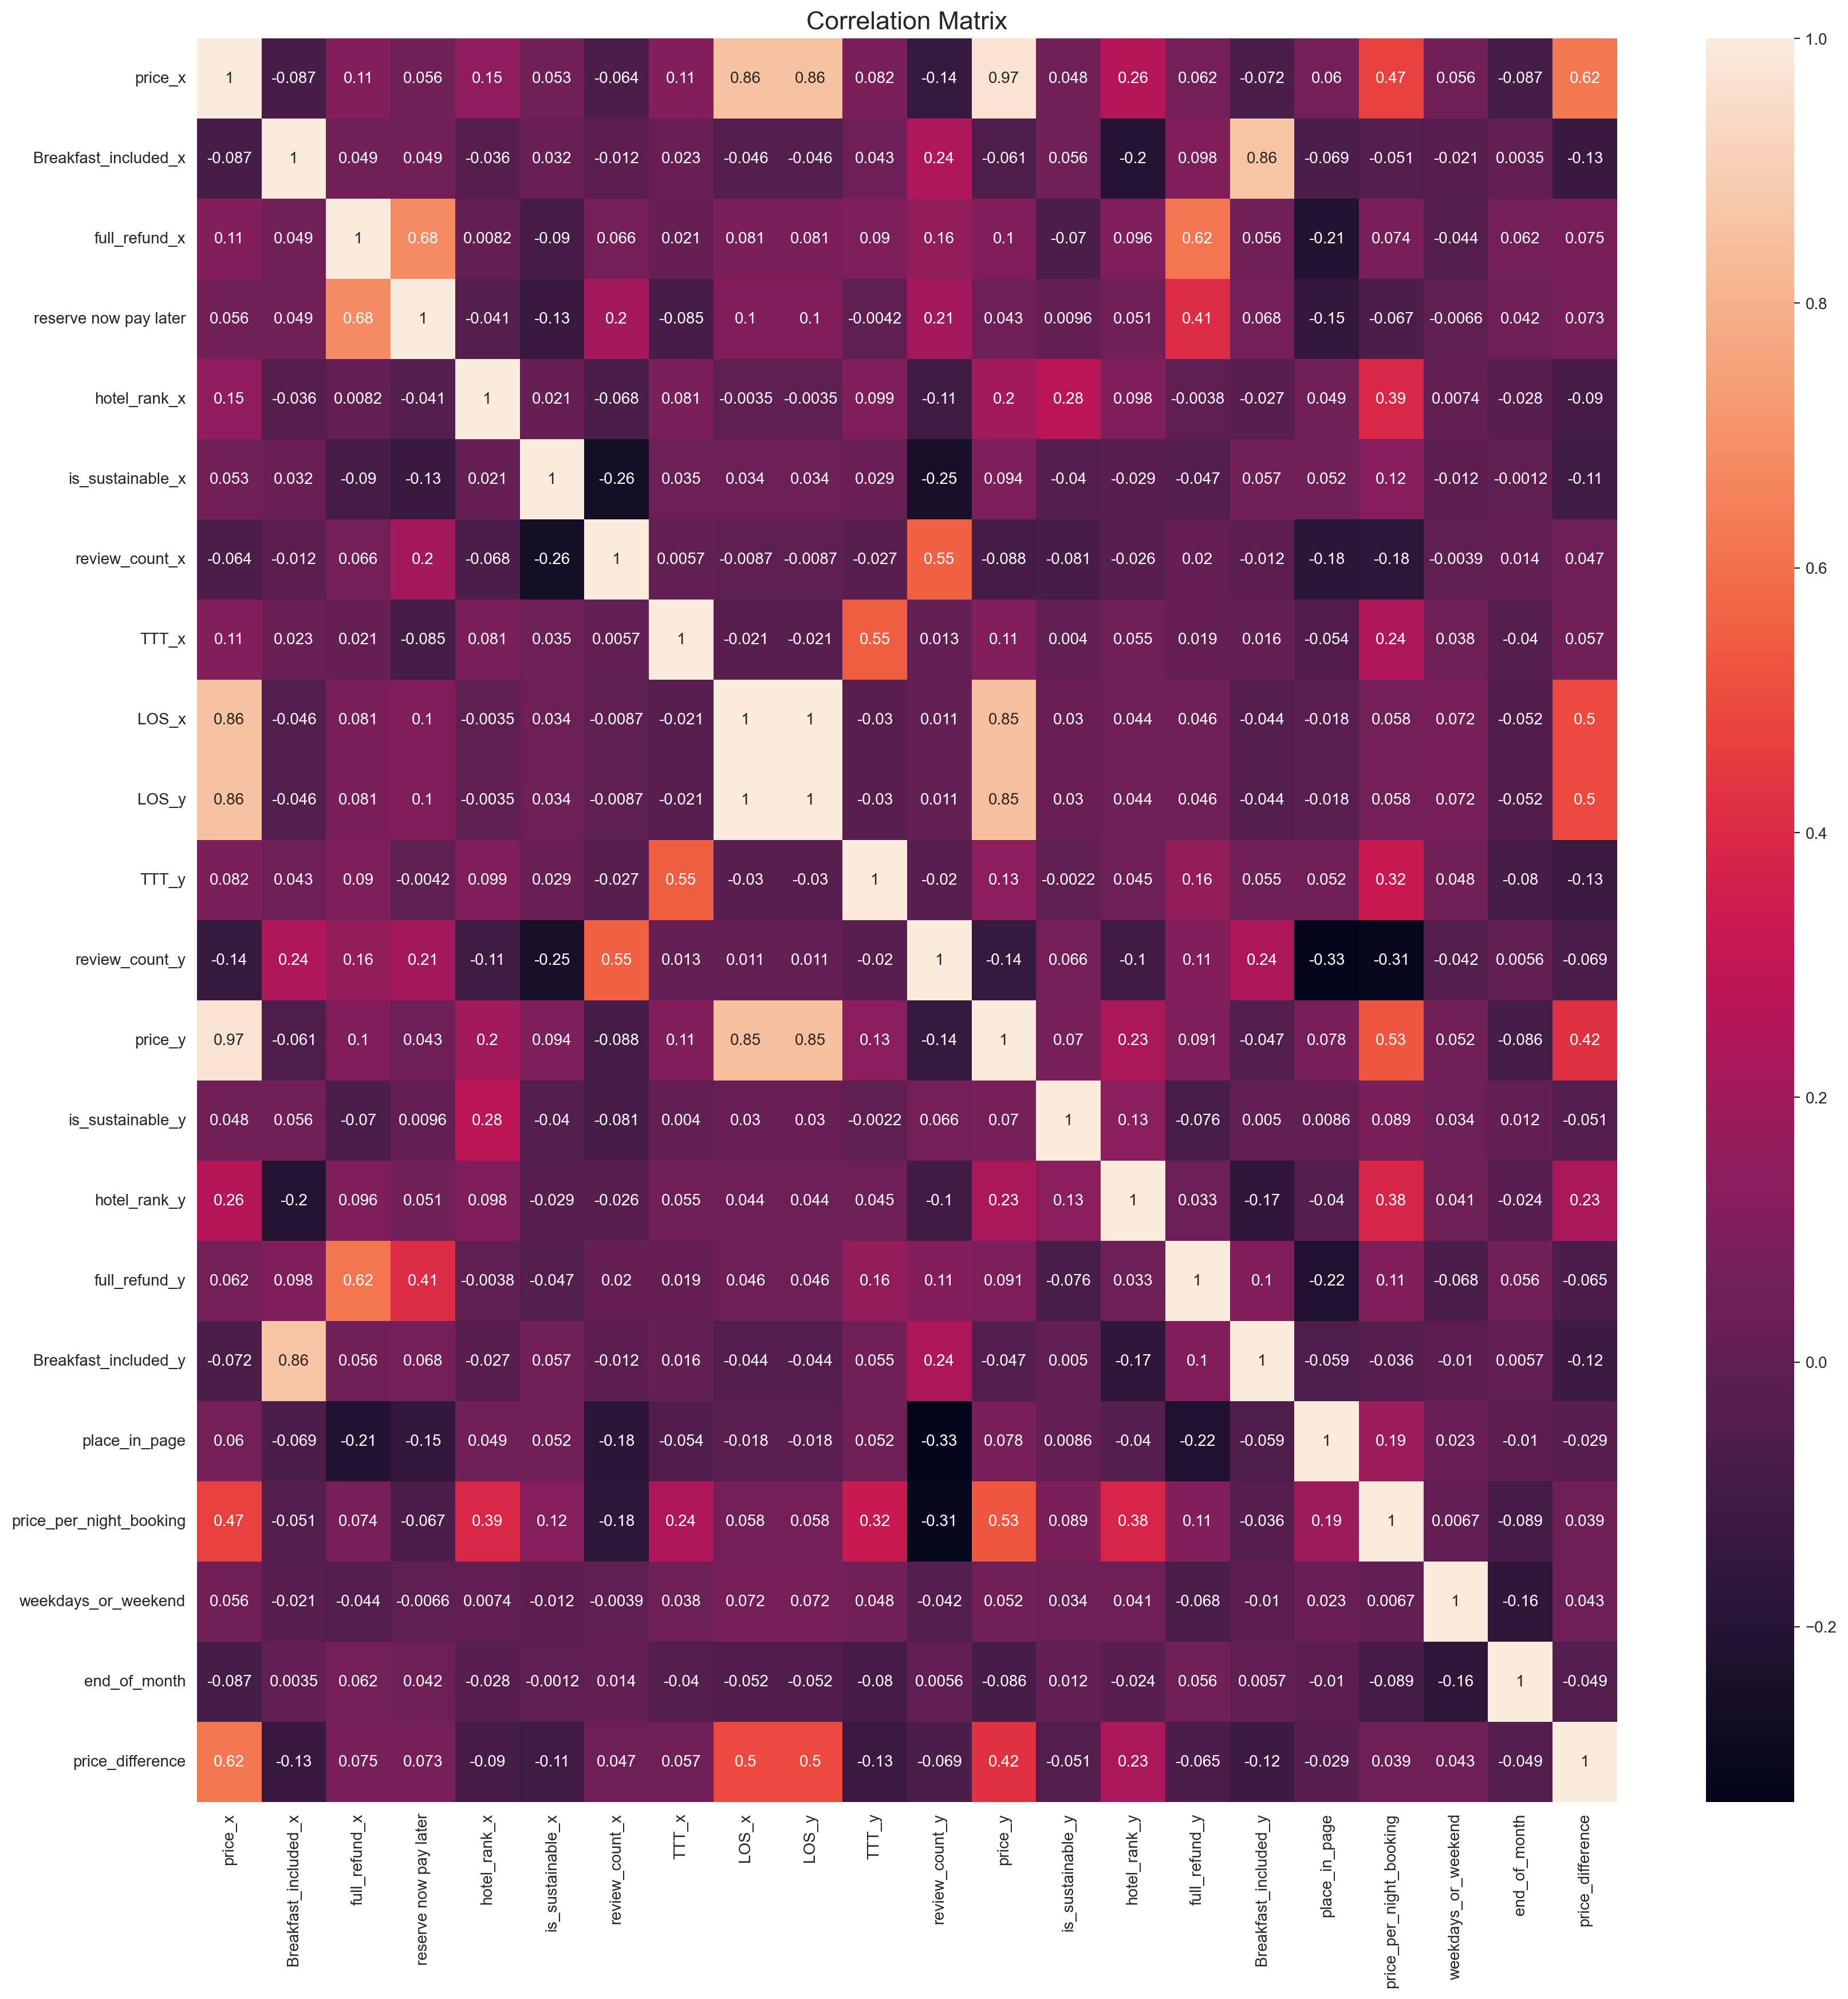

In [27]:
corr_matrix = df_merged.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## lets try to predict the price difference of booking and expedia

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [31]:
y = df_merged['price_difference']
X = df_merged.drop(['price_difference','price_x','price_y','price_per_night_booking','LOS_x','TTT_x','name','check_in','check_out'],axis=1)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39245 entries, 0 to 39244
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Breakfast_included_x   39245 non-null  int64  
 1   full_refund_x          39245 non-null  int64  
 2   reserve now pay later  39245 non-null  int64  
 3   hotel_rank_x           39245 non-null  float64
 4   is_sustainable_x       39245 non-null  int64  
 5   review_count_x         39245 non-null  int64  
 6   LOS_y                  39245 non-null  int64  
 7   TTT_y                  39245 non-null  int64  
 8   review_count_y         39245 non-null  float64
 9   is_sustainable_y       39245 non-null  int64  
 10  hotel_rank_y           39245 non-null  float64
 11  full_refund_y          39245 non-null  int64  
 12  Breakfast_included_y   39245 non-null  int64  
 13  place_in_page          39245 non-null  int64  
 14  weekdays_or_weekend    39245 non-null  int64  
 15  en

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## linear regression

In [34]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_pred_train = lreg.predict(x_train)
y_pred_test = lreg.predict(x_test)
print("score of linear regression is ->",lreg.score(x_train,y_train))

score of linear regression is -> 0.36181122459107207


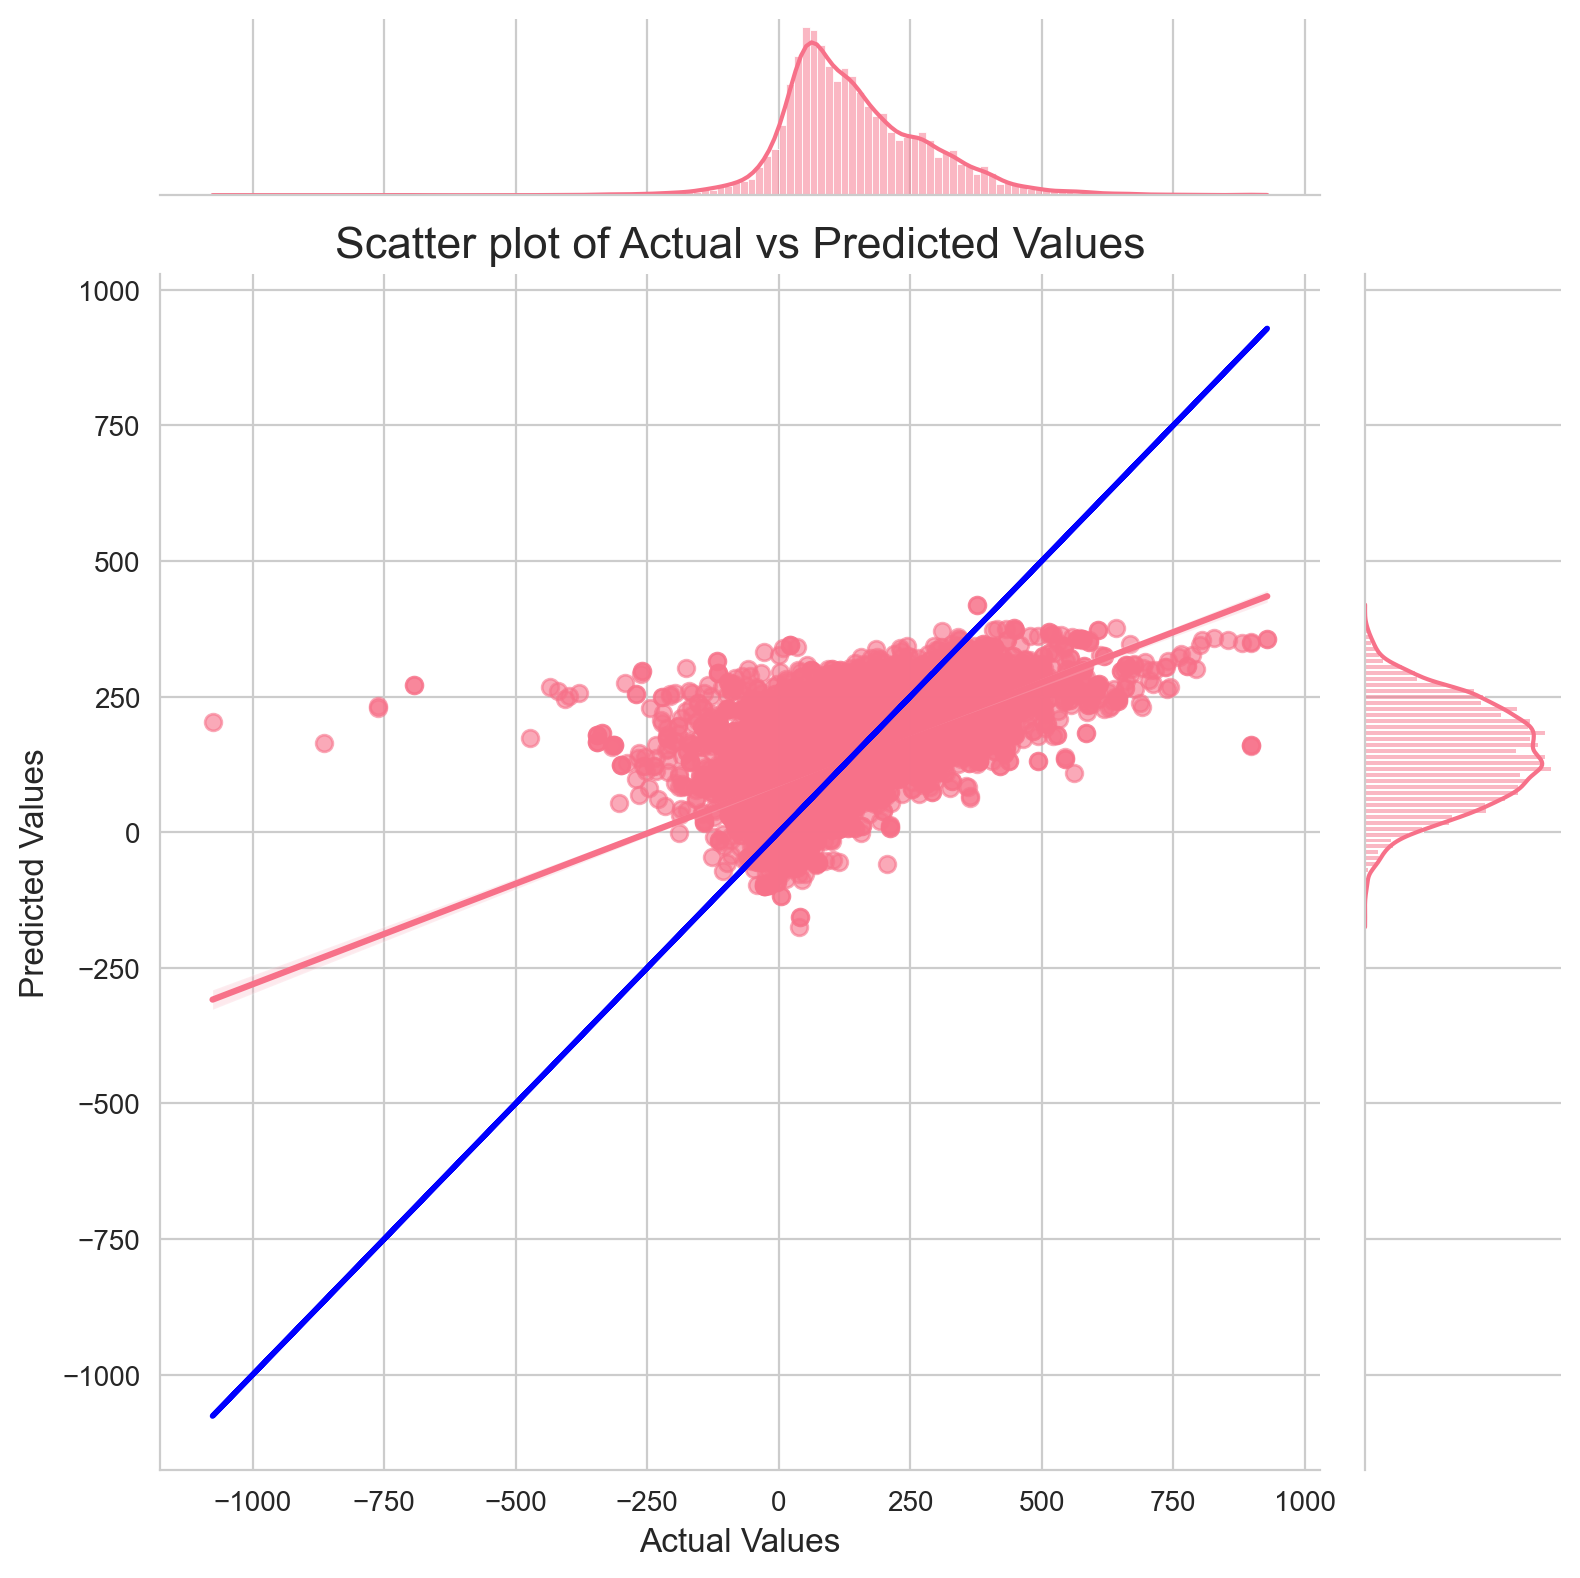

In [35]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

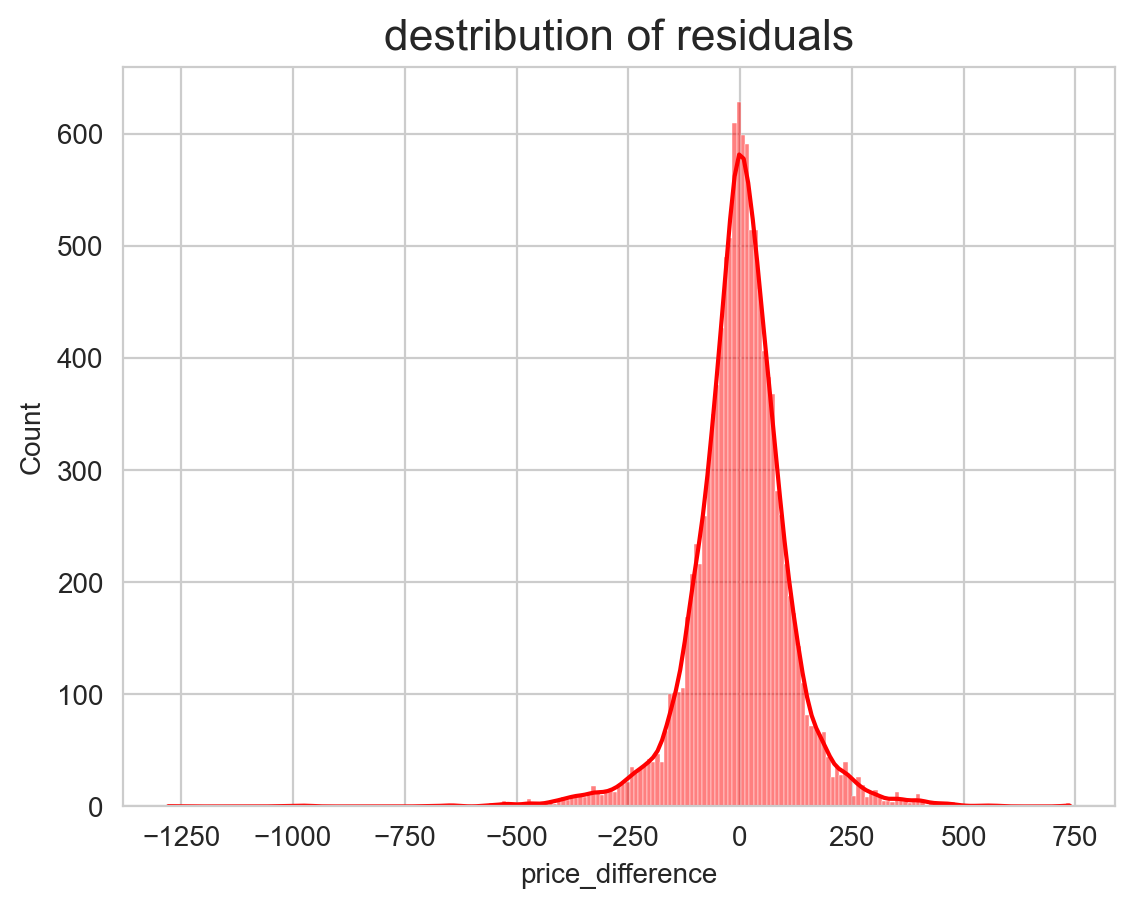

In [36]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

In [37]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the linear regression on price per night: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg_per_night)

the scores of the linear regression on price per night: 
mse:  12232.914131849624
rmse:  110.60250508849076
mae:  76.34372172691097
r2_score:  0.37251985652803865


## Gradient Boosting Regressor

In [38]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=6, population_size=50, verbosity=2)
tpot.fit(X, y)
print(tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/350 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -8060.823750194744

Generation 2 - Current best internal CV score: -7895.942136362071

Generation 3 - Current best internal CV score: -7455.168486157518

Generation 4 - Current best internal CV score: -7455.168486157518

Generation 5 - Current best internal CV score: -7455.168486157518

Generation 6 - Current best internal CV score: -7198.568769357984

Best pipeline: RandomForestRegressor(Normalizer(input_matrix, norm=max), bootstrap=False, max_features=0.55, min_samples_leaf=20, min_samples_split=11, n_estimators=100)
Pipeline(steps=[('normalizer', Normalizer(norm='max')),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.55,
                                       min_samples_leaf=20,
                                       min_samples_split=11))])


In [39]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

gp_model = GradientBoostingRegressor(alpha=0.95,
                                     learning_rate=0.1,
                                     loss='ls', max_depth=9,
                                     max_features=0.45,
                                     min_samples_leaf=16,
                                     min_samples_split=6,
                                     n_estimators=100,
                                     subsample=1.0)
gp_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.95, loss='ls', max_depth=9, max_features=0.45,
                          min_samples_leaf=16, min_samples_split=6)

In [40]:
gp_model.score(x_train, y_train)

0.9118333660966365

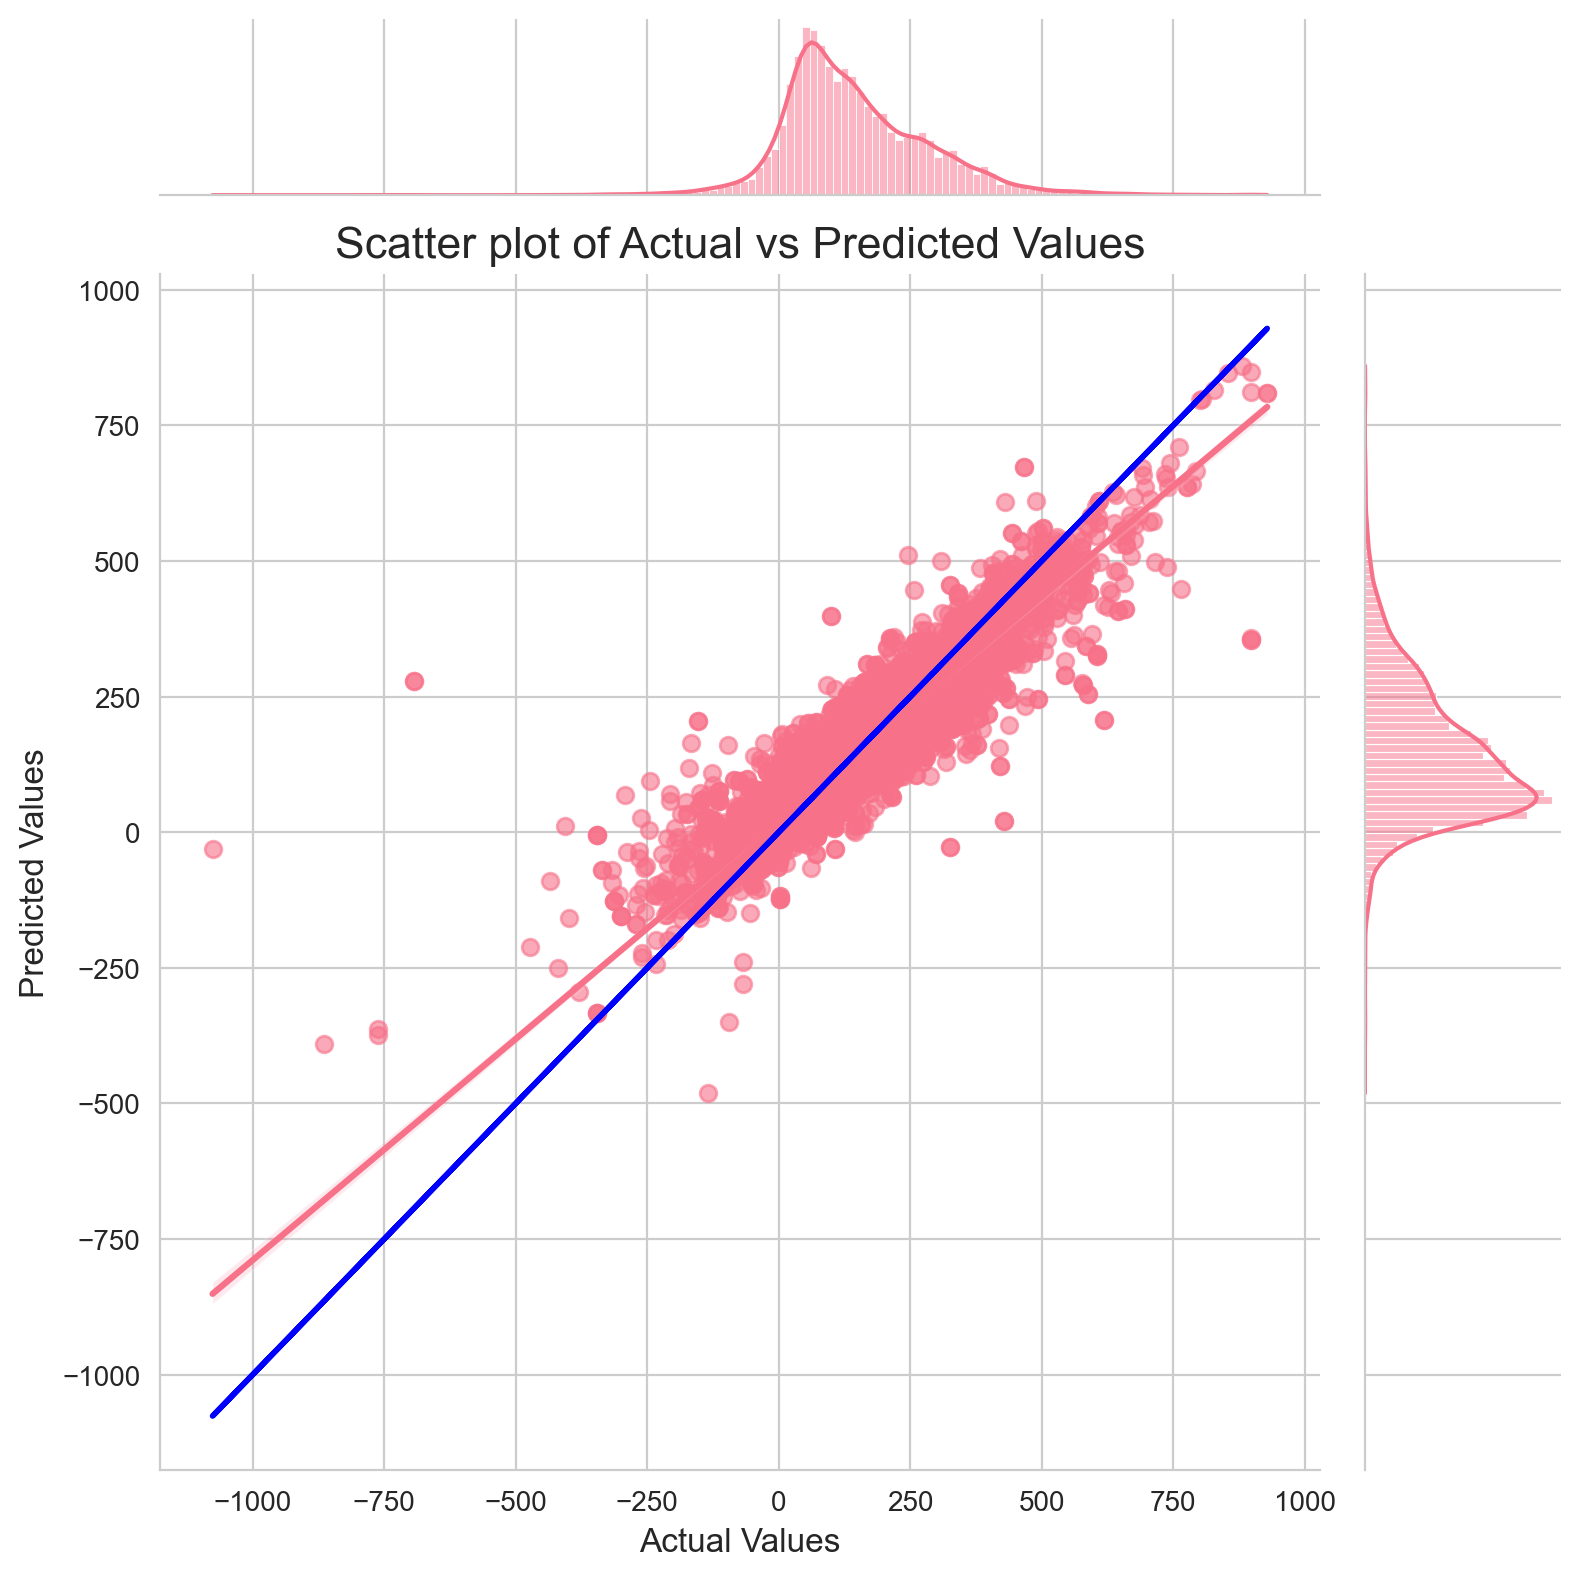

In [41]:
y_pred_train = gp_model.predict(x_train)
y_pred_test = gp_model.predict(x_test)

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_gp_score = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the gardient boosting on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_gp_score)

the scores of the gardient boosting on price: 
mse:  2650.146906020569
rmse:  51.47957756256911
mae:  29.80299308461098
r2_score:  0.8640622714352261


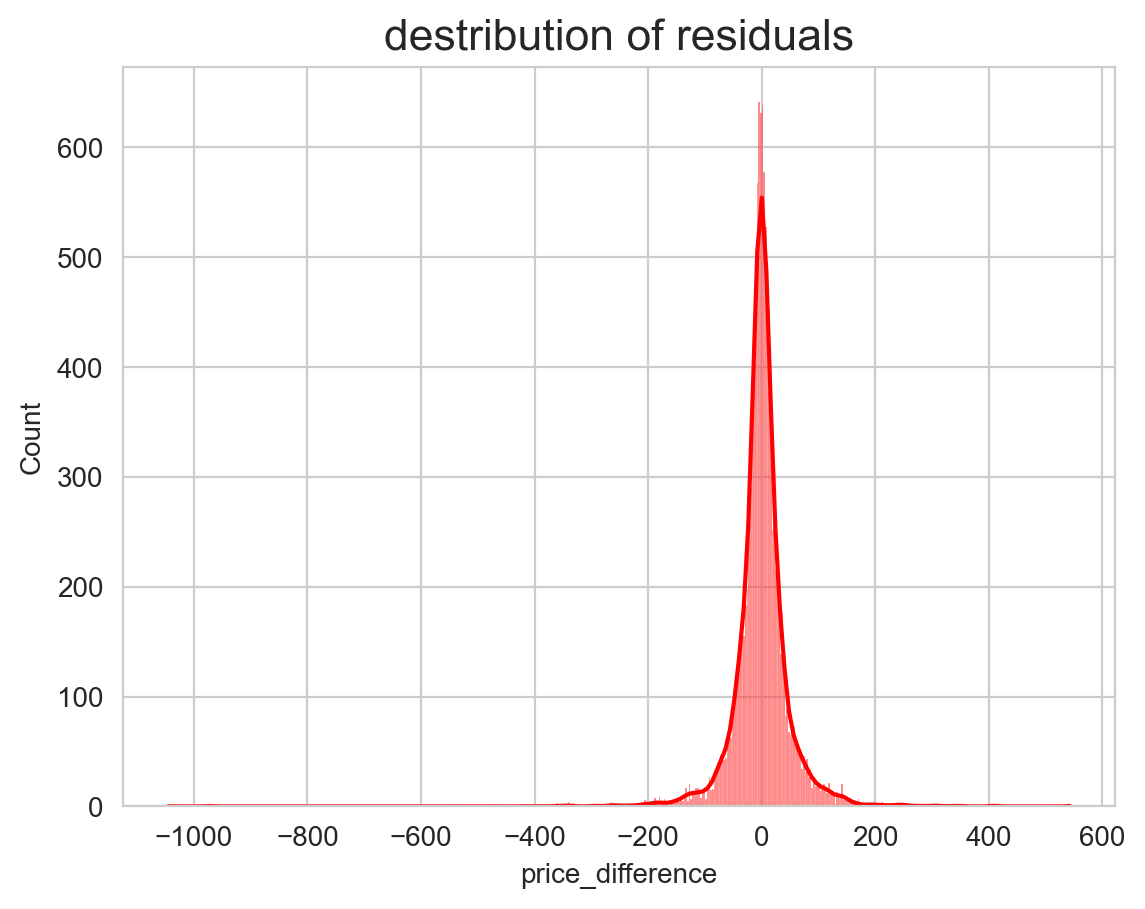

In [43]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

## desicion tree regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr_model = DecisionTreeRegressor(max_depth=9,
                                  min_samples_leaf=16,
                                  min_samples_split=6)
dtr_model.fit(x_train, y_train)
dtr_model.score(x_train, y_train)

0.5781394593641165

In [46]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the linear regression on price per night: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg_per_night)

the scores of the linear regression on price per night: 
mse:  2650.146906020569
rmse:  51.47957756256911
mae:  29.80299308461098
r2_score:  0.8640622714352261


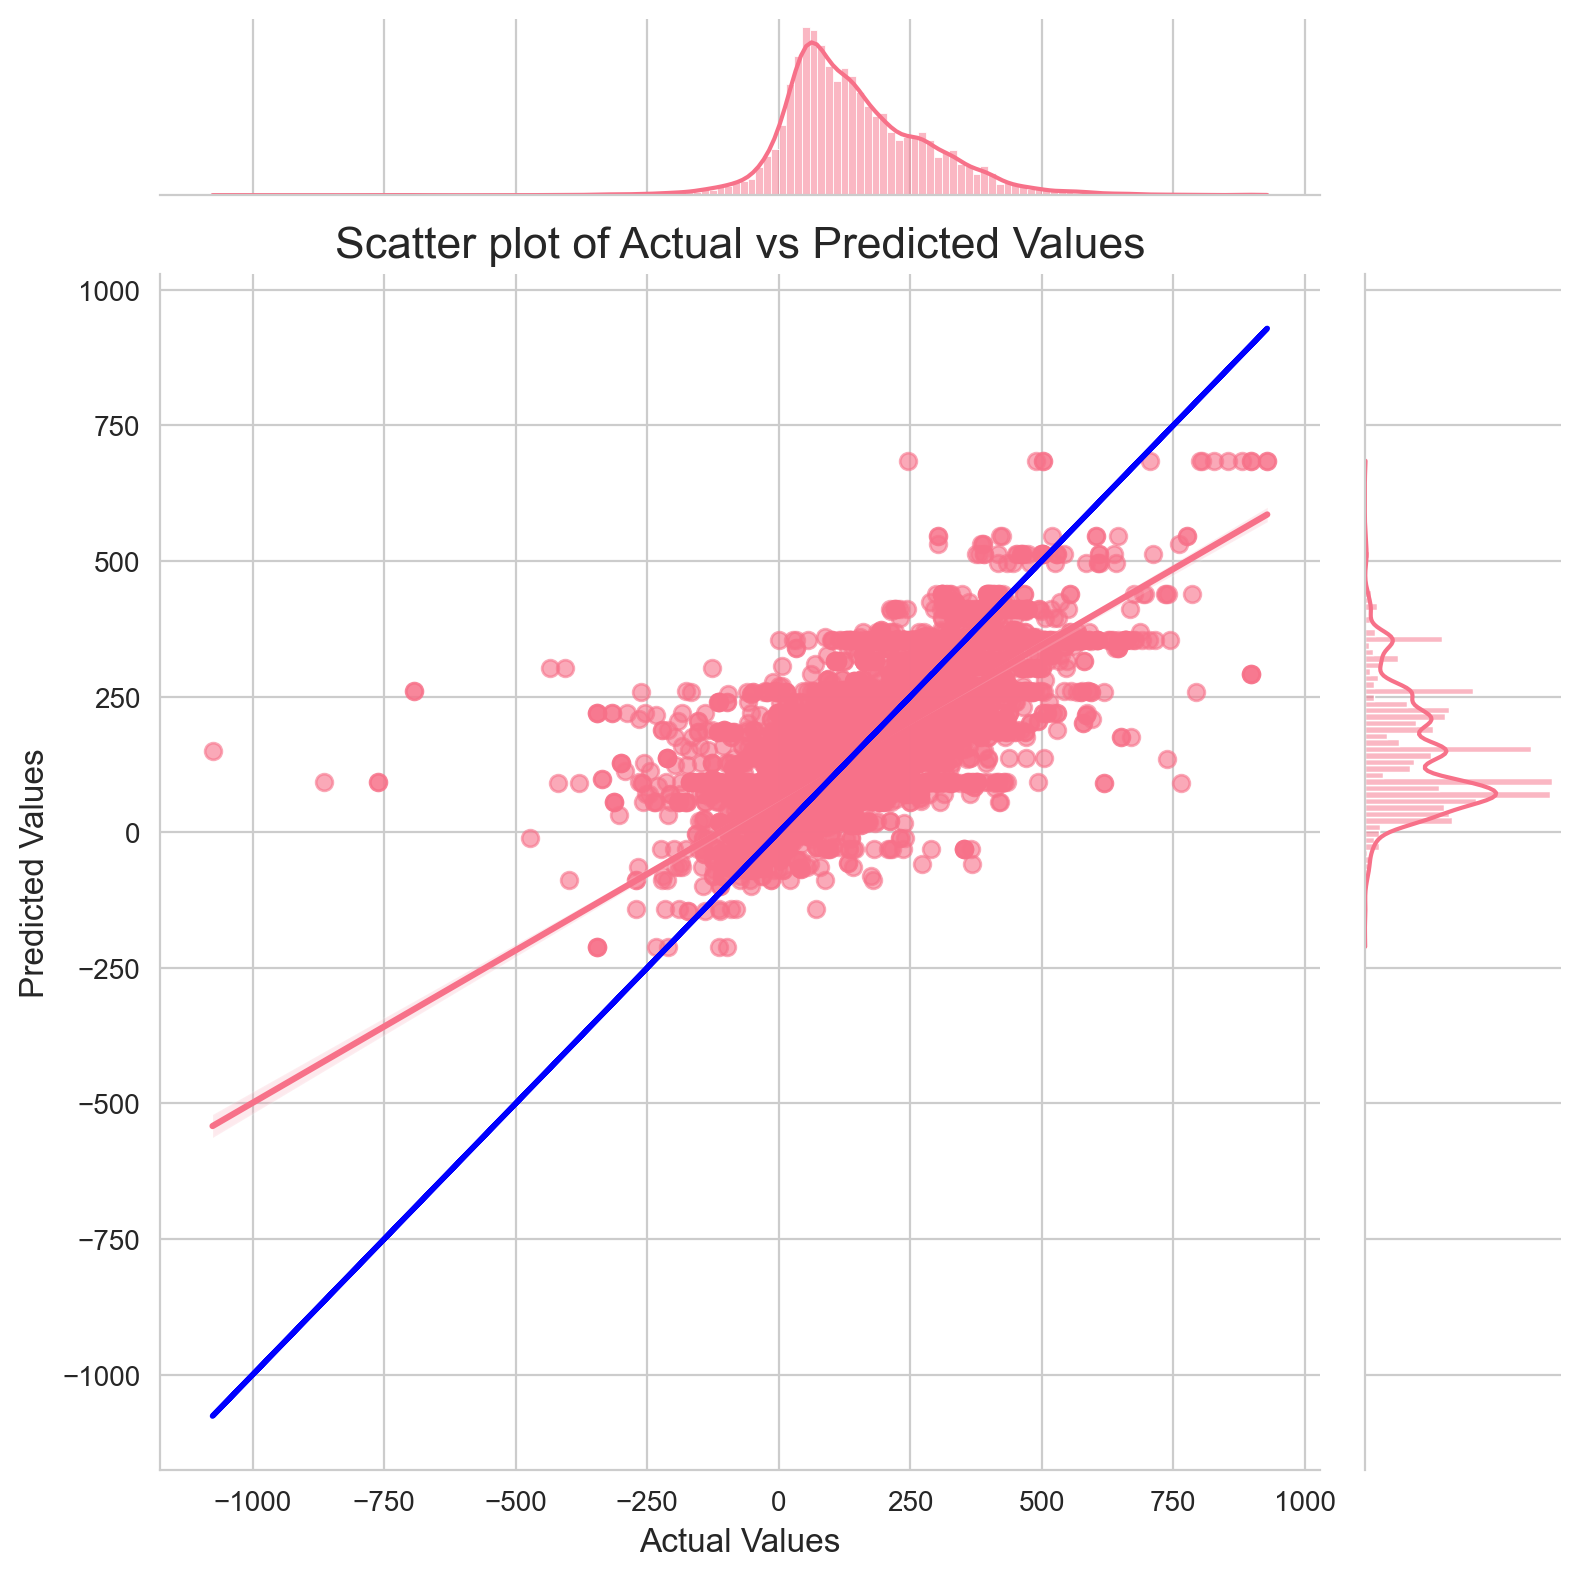

In [47]:
y_pred_train = dtr_model.predict(x_train)
y_pred_test = dtr_model.predict(x_test)

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

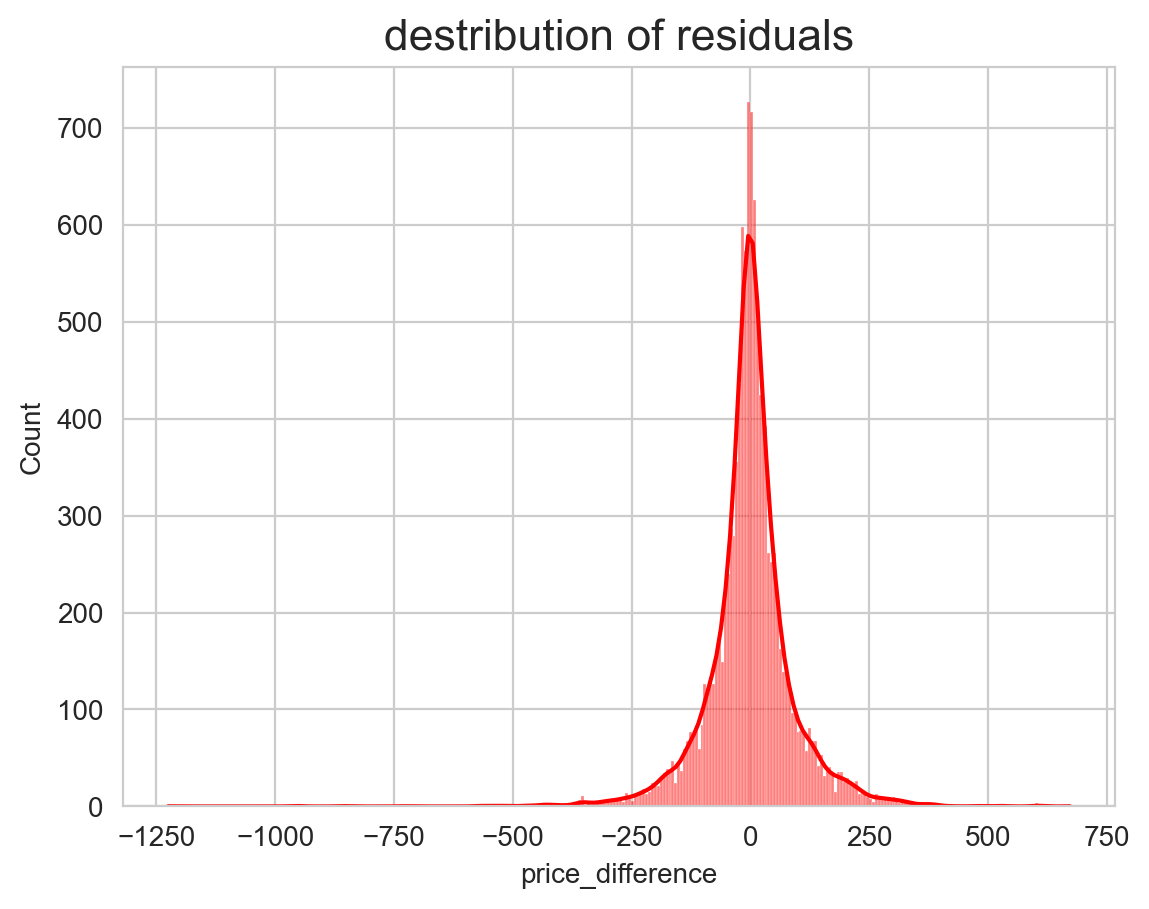

In [48]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

## random forest regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr_model = RandomForestRegressor(n_estimators=100,
                                  min_samples_leaf=16,
                                  min_samples_split=6)
rfr_model.fit(x_train, y_train)

print("Random Forest Regressor")
print('__________________________________________________________')
print(f'random forest regressor score: {rfr_model.score(x_train, y_train)}')
y_pred_train = rfr_model.predict(x_train)
y_pred_test = rfr_model.predict(x_test)
print("y_pred_train: ", y_pred_train)
print("y_pred_test: ", y_pred_test)

Random Forest Regressor
__________________________________________________________
random forest regressor score: 0.7981785073196441
y_pred_train:  [ 33.37483846 130.84401995  84.46158042 ... 173.31710117  58.1290179
 264.72700084]
y_pred_test:  [ -3.38326784 251.33669837 115.22900347 ... 240.78867676 345.2925184
 283.53270639]


In [51]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the random forest on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg_per_night)

the scores of the random forest on price: 
mse:  4670.502228479507
rmse:  68.3410727782313
mae:  39.847517736189296
r2_score:  0.7604293321423552


<Figure size 500x500 with 0 Axes>

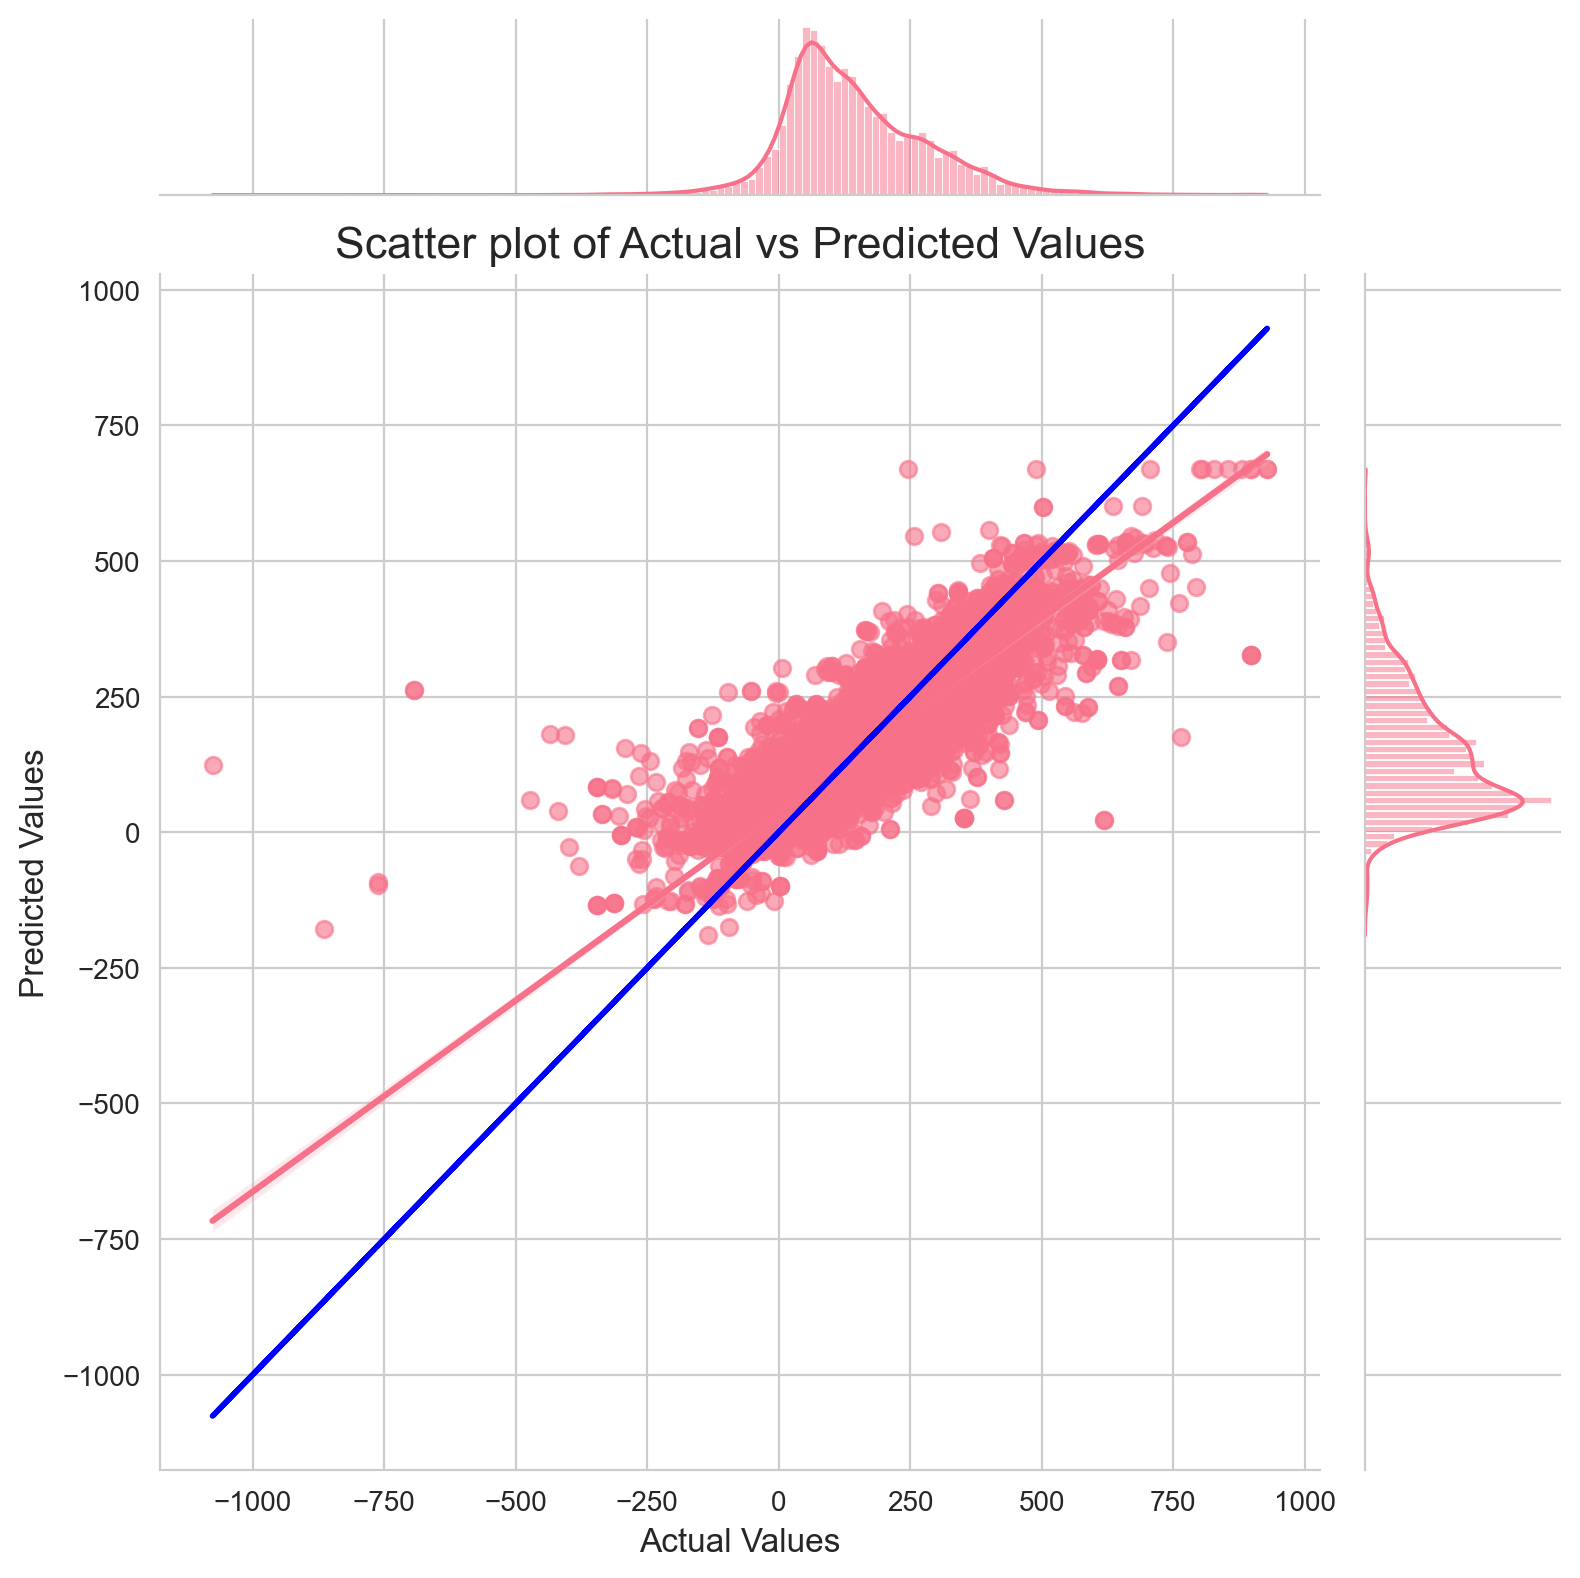

In [52]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

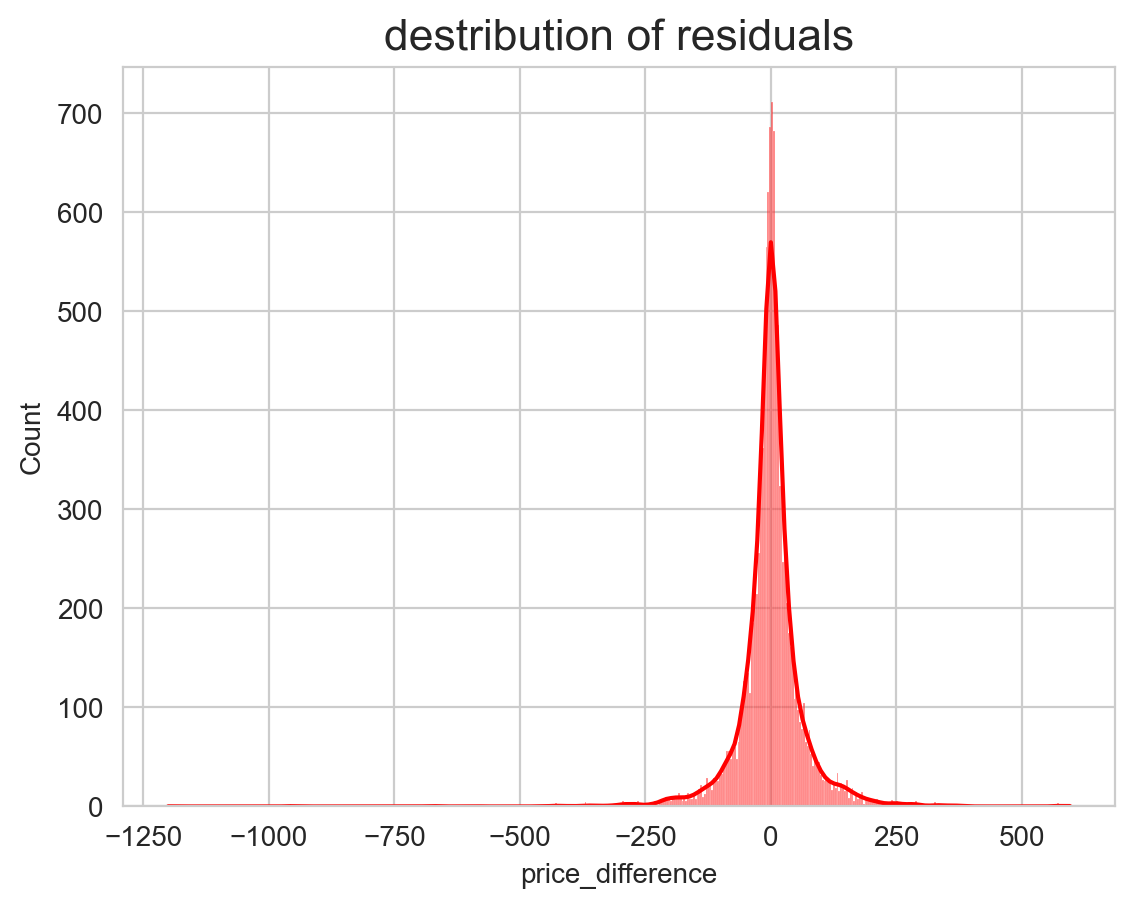

In [53]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

## ELASTICNET

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
elasticnet_model = ElasticNet(alpha=0.2, l1_ratio=0.99,fit_intercept=True)
elasticnet_model.fit(x_train, y_train)
elasticnet_model.score(x_train, y_train)

0.3615150762070247

In [56]:
y_pred_train = elasticnet_model.predict(x_train)
y_pred_test = elasticnet_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the random forest on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg_per_night)

the scores of the random forest on price: 
mse:  12238.979646848493
rmse:  110.6299220231511
mae:  76.28075866187076
r2_score:  0.3722087294997035


<Figure size 500x500 with 0 Axes>

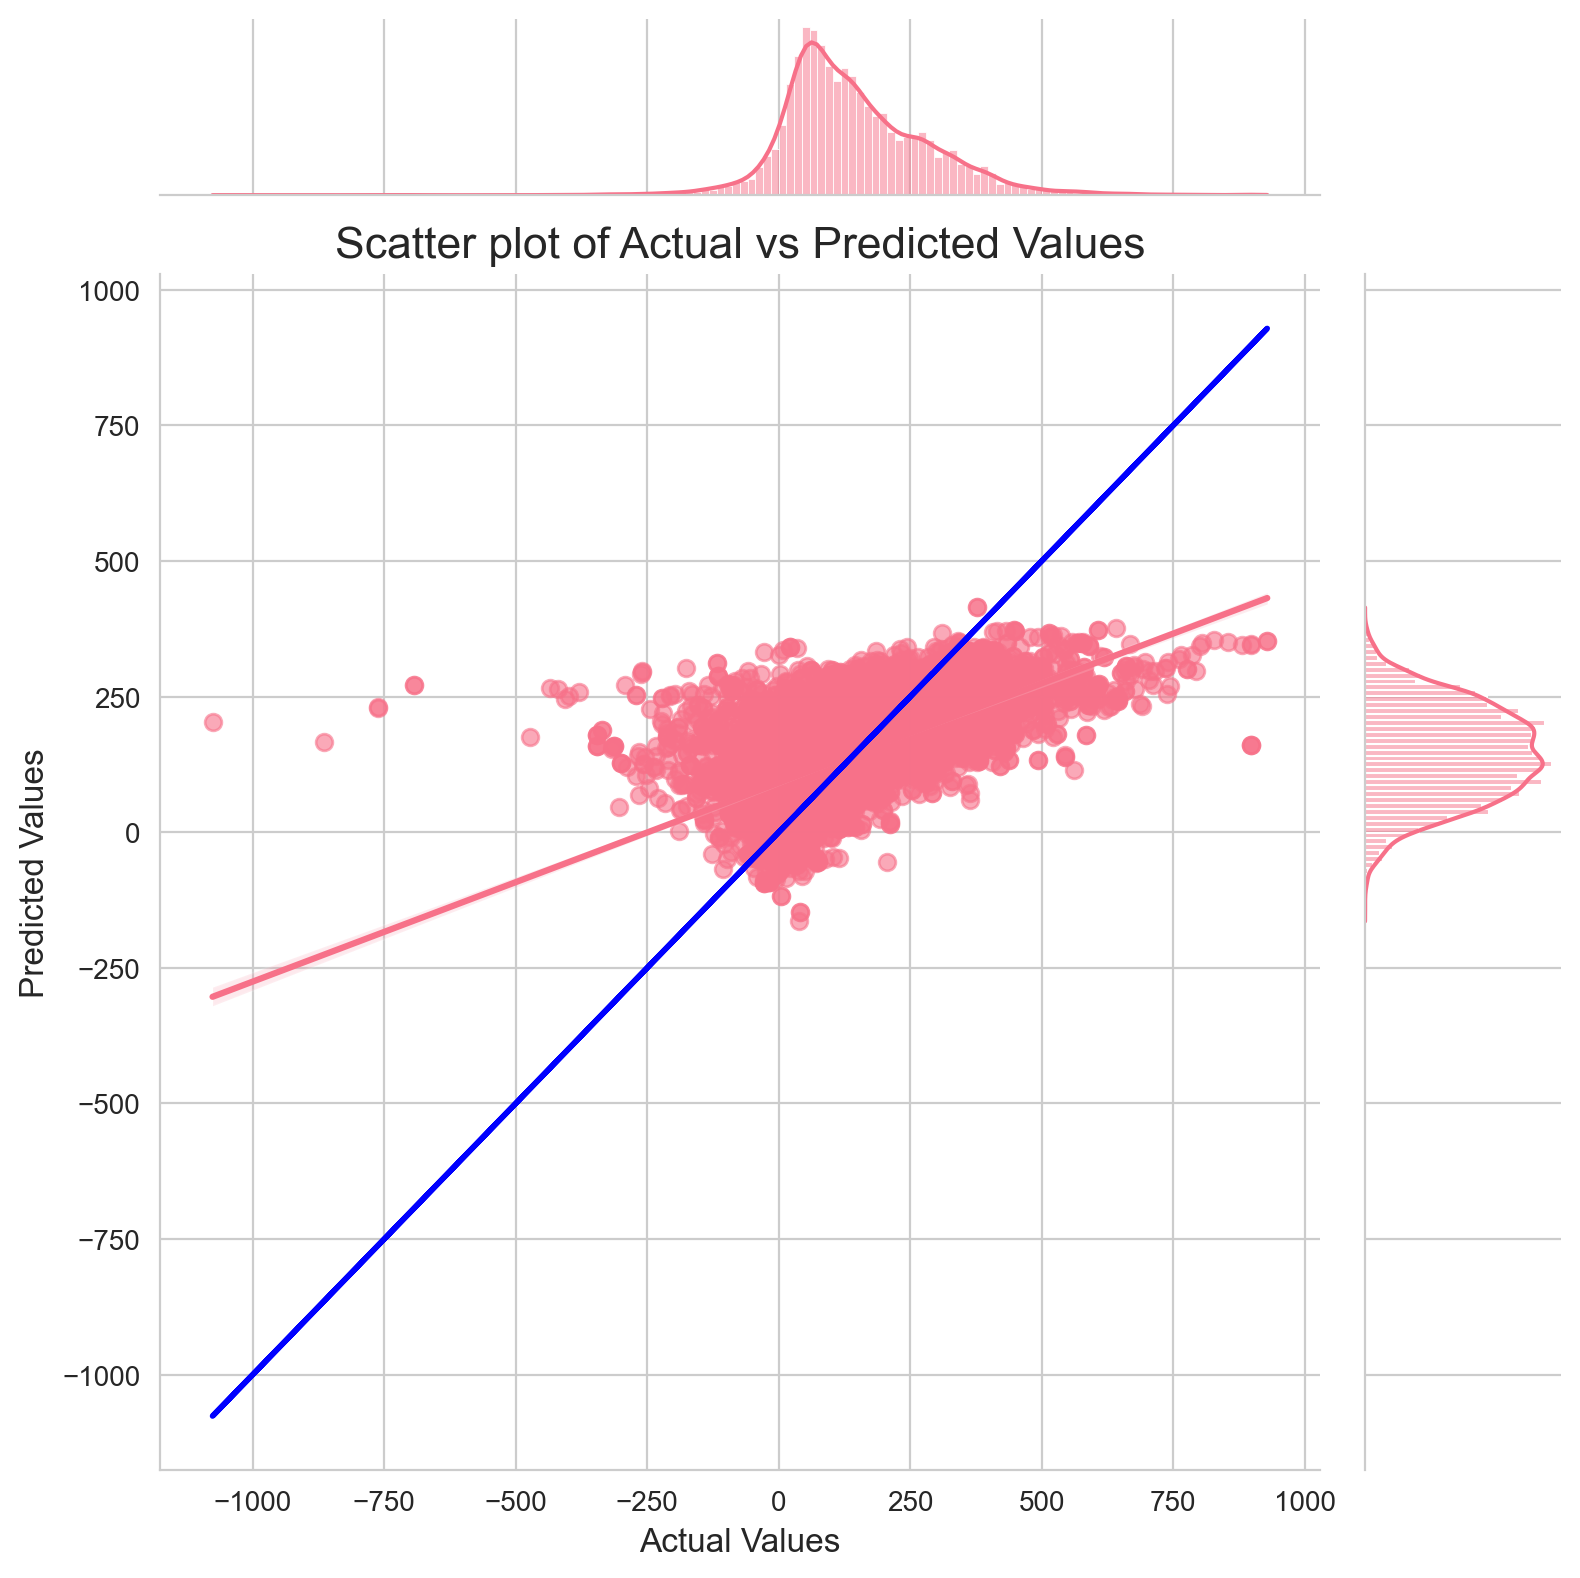

In [57]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

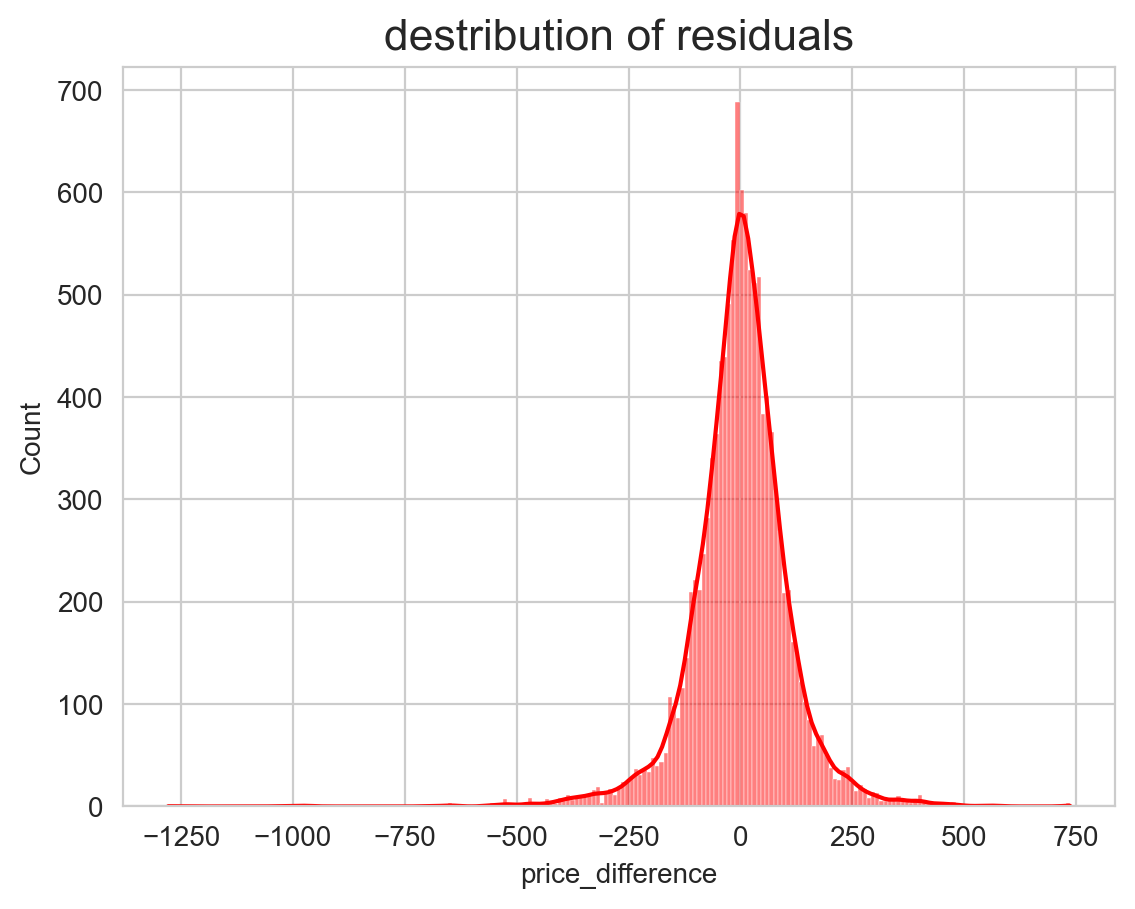

In [58]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

# svr

In [59]:
from sklearn.svm import SVR

In [60]:
svr_model = SVR(kernel='rbf', C=1.0)

In [61]:
svr_model.fit(x_train, y_train)

SVR()

In [62]:
svr_model.score(x_train, y_train)

0.020951049354282714

In [64]:
y_pred_train = svr_model.predict(x_train)
y_pred_test = svr_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the random forest on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg_per_night)

the scores of the random forest on price: 
mse:  19013.916353318604
rmse:  137.89095820001617
mae:  100.37453303515143
r2_score:  0.024692331463273653
the scores of the random forest on price: 
mse:  19013.916353318604
rmse:  137.89095820001617
mae:  100.37453303515143
r2_score:  0.024692331463273653


<Figure size 500x500 with 0 Axes>

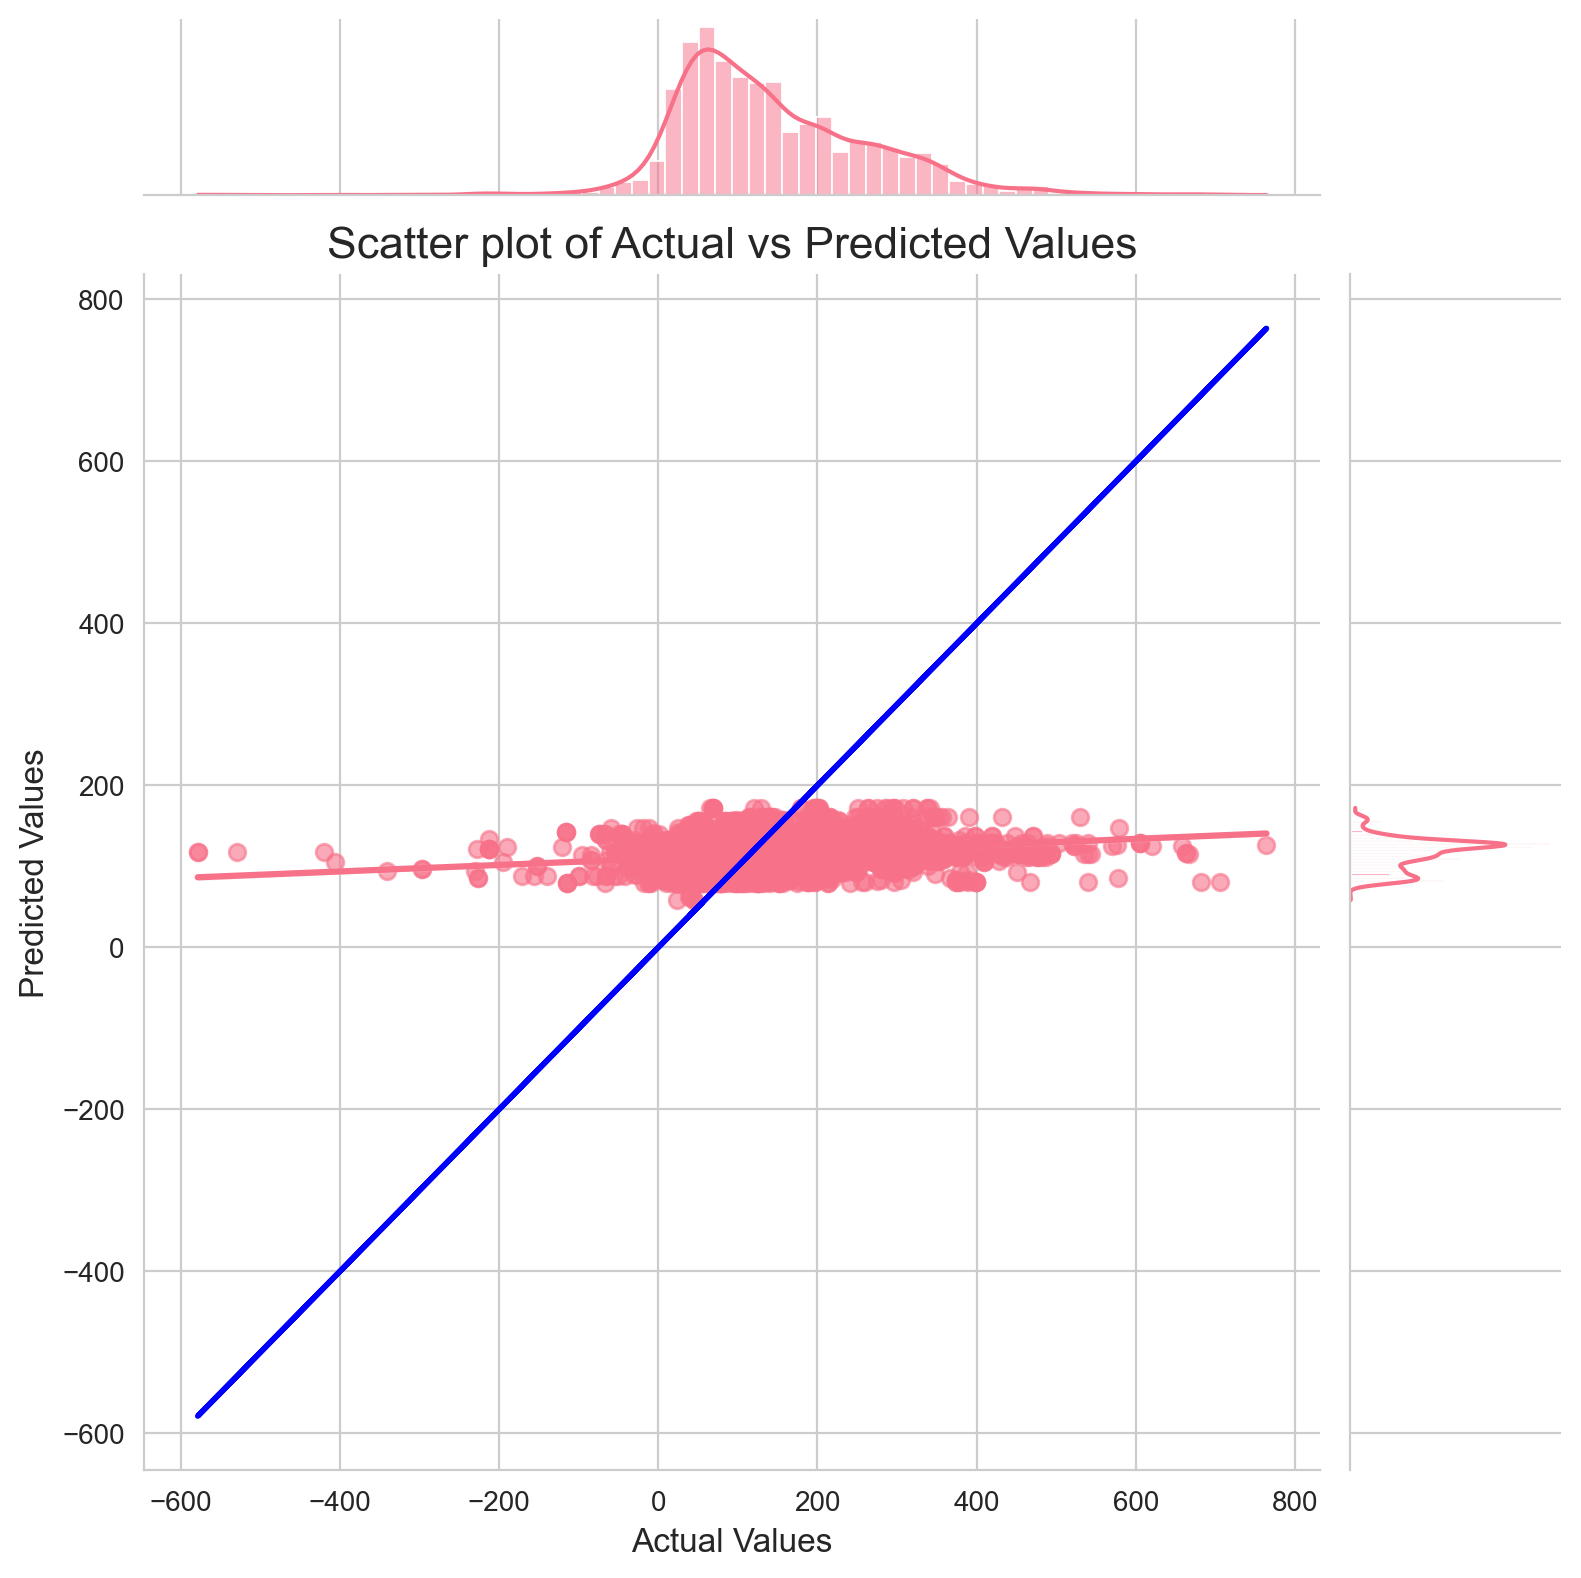

In [36]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

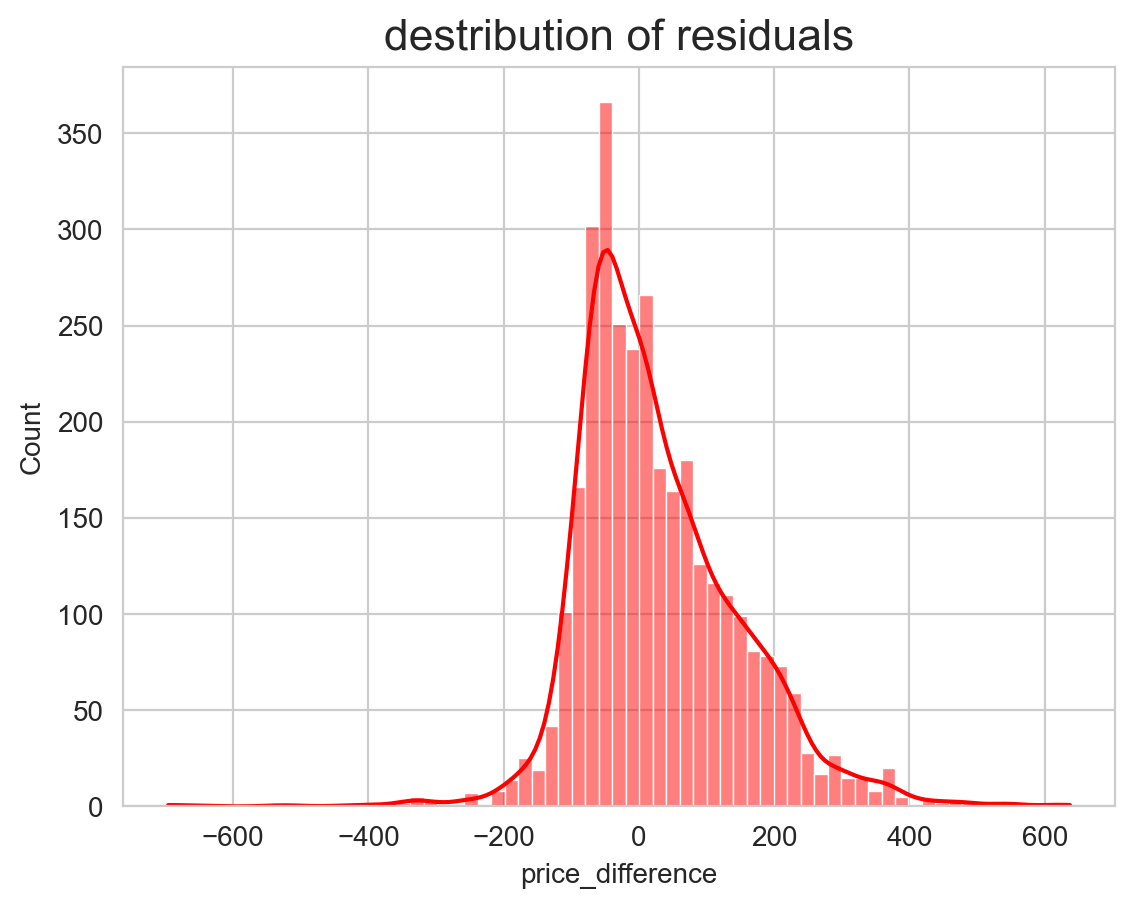

In [37]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

## lets try to make a model of 0.25 train and 0.75 test

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=42)

In [67]:
gp_model = GradientBoostingRegressor(alpha=0.95,
                                     learning_rate=0.1,
                                     loss='ls', max_depth=9,
                                     max_features=0.45,
                                     min_samples_leaf=16,
                                     min_samples_split=6,
                                     n_estimators=100,
                                     subsample=1.0)
gp_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.95, loss='ls', max_depth=9, max_features=0.45,
                          min_samples_leaf=16, min_samples_split=6)

In [68]:
gp_model.score(x_train, y_train)

0.9030588734808762

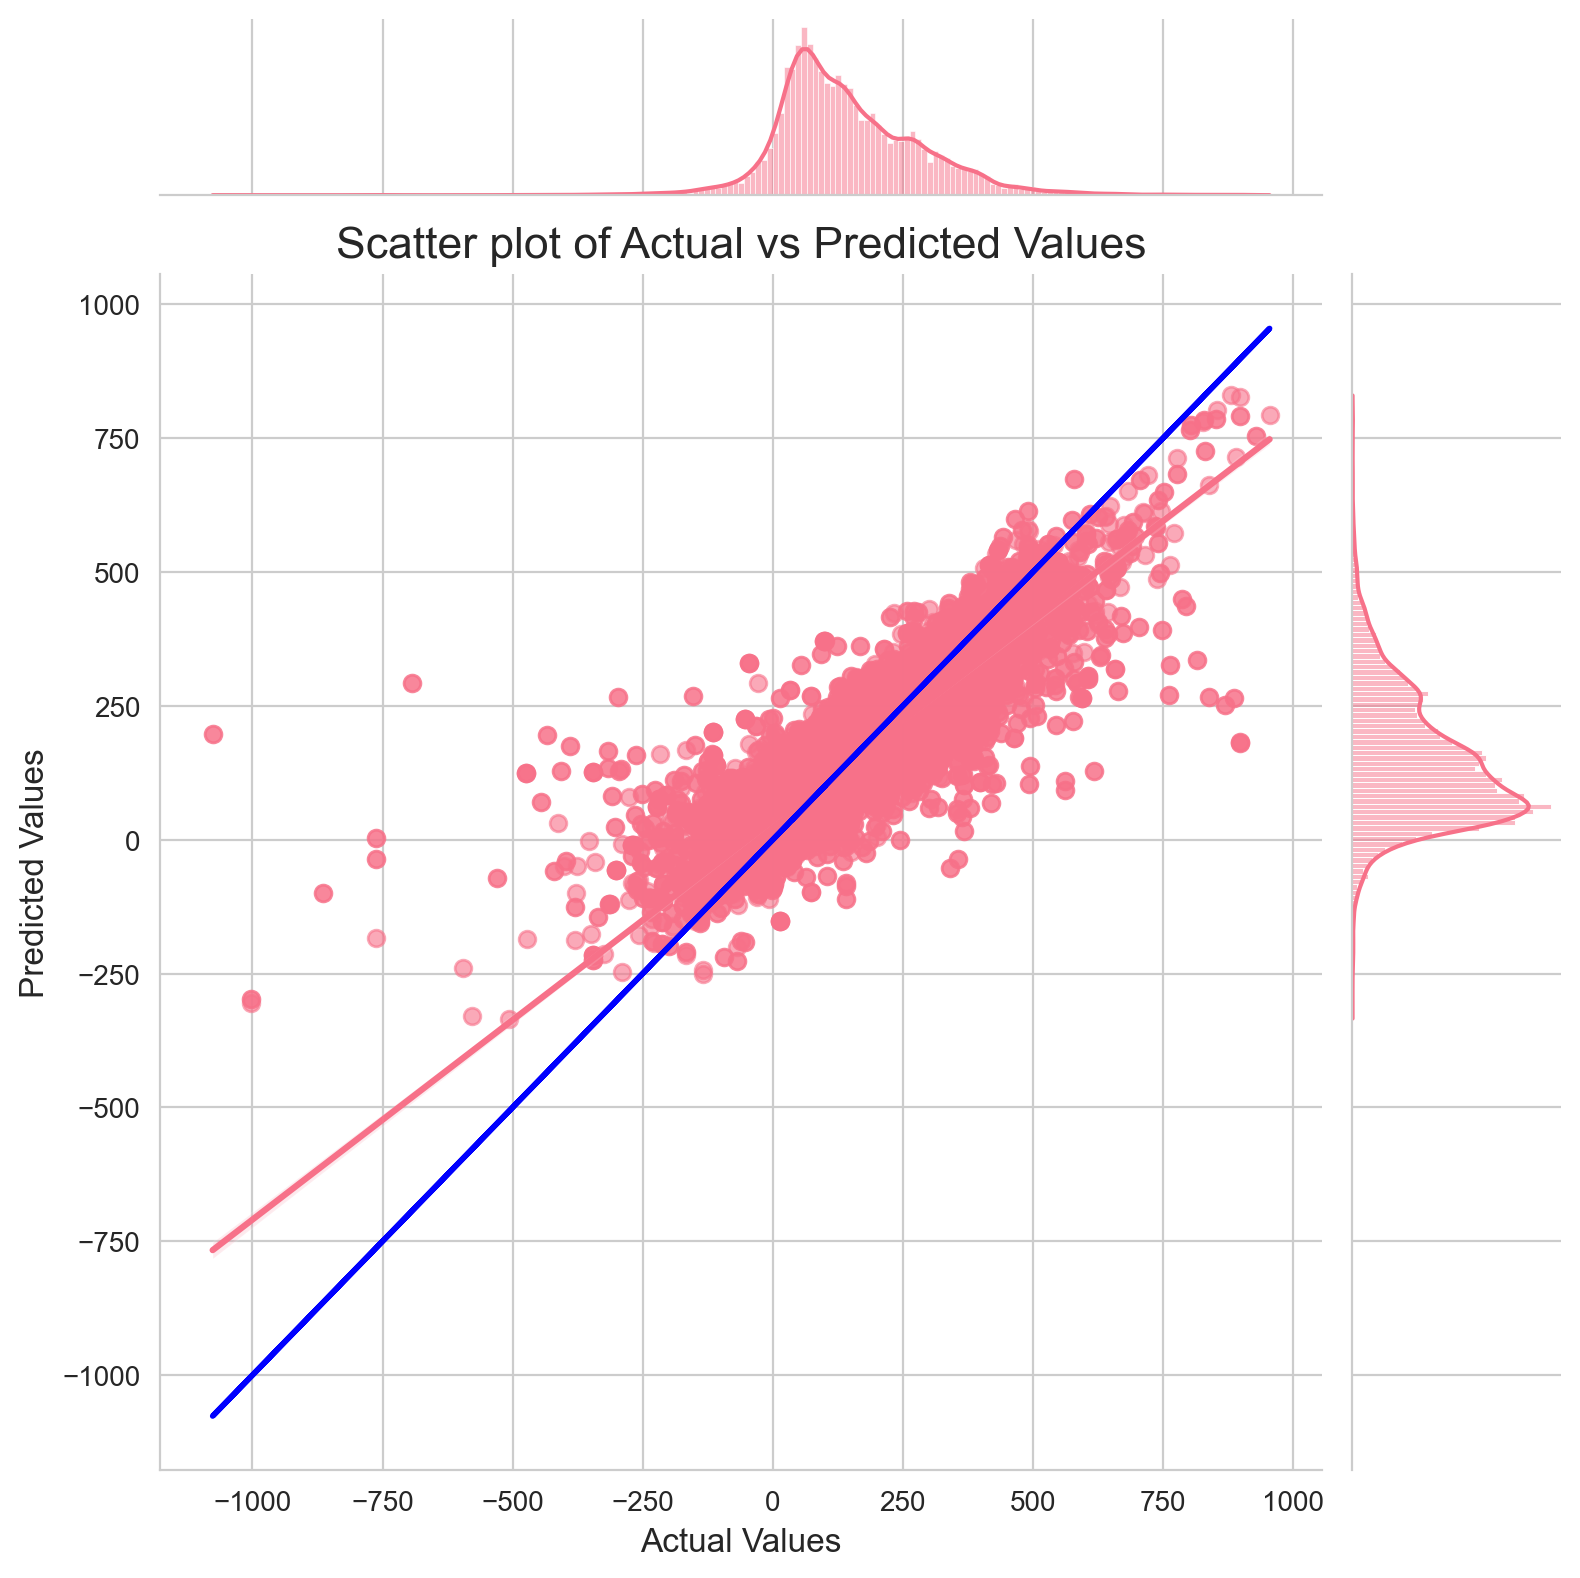

In [69]:
y_pred_train = gp_model.predict(x_train)
y_pred_test = gp_model.predict(x_test)

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

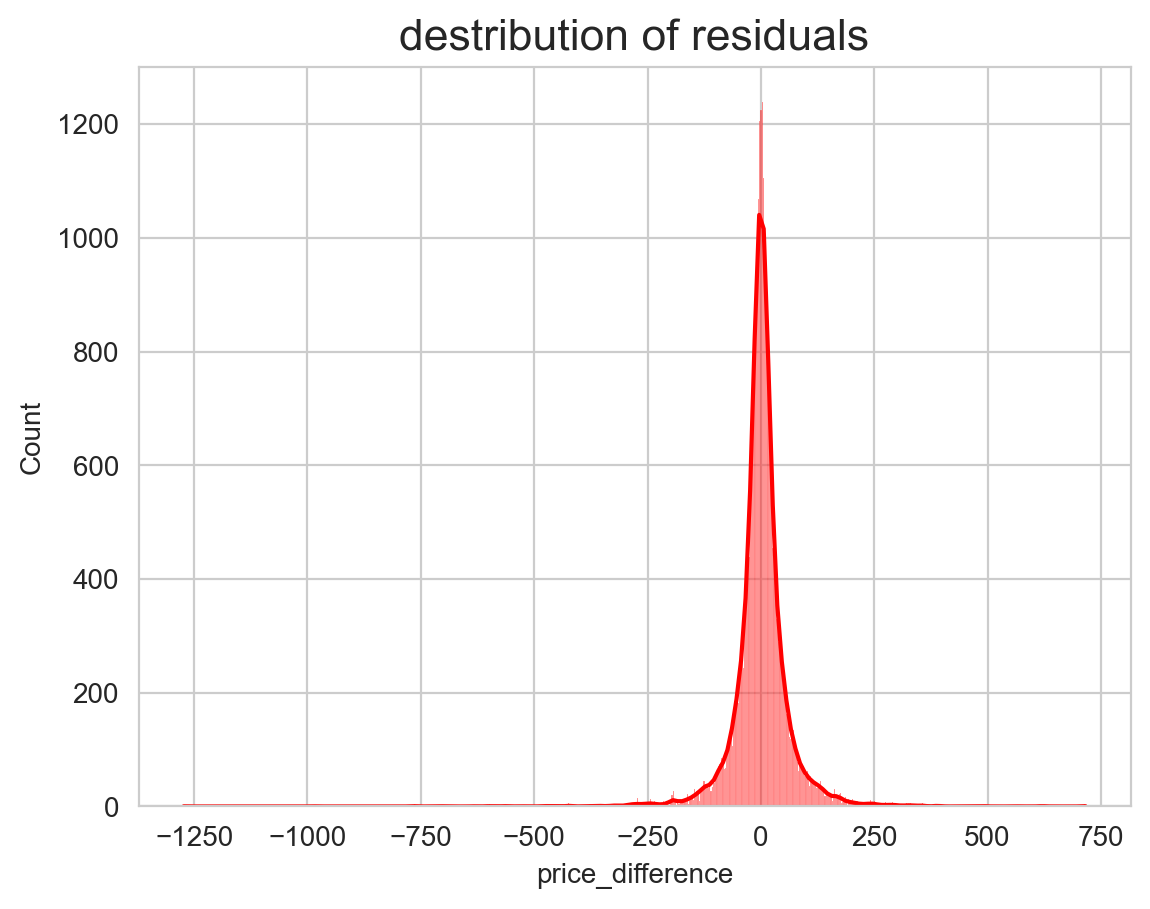

In [70]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

In [71]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_gp_score = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the gardient boosting on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_gp_score)

the scores of the gardient boosting on price: 
mse:  4091.1699479842587
rmse:  63.962254087737236
mae:  36.65313705998815
r2_score:  0.7932029845254488


### what we learn from this part:

## Because we deleted many data from both databases, we have some features that help us predict the price for each of them even though we have the same hotels with the same name, and we enter the exact date for the same period of time' the prediction based on the different website isn’t sound off.
## as a further traveler we now know that we better get our hotel from booking because we can see that it’s more often cheaper from Expedia